### 1.Graph Analysis

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

# # Read the data
# # kegg_df = pd.read_csv('./datainfo-oneil/raw_data/KEGG/full_kegg_pathway_list.csv')
# kegg_df = pd.read_csv('./datainfo-oneil/init_data/up_kegg.csv')
# # Create a graph from the dataframe
# G = nx.from_pandas_edgelist(kegg_df, 'src', 'dest')

# from itertools import product

# def longest_shortest_path(G):
#     max_path_length = -1
#     path_nodes = None

#     # Iterate over all pairs of nodes
#     for source, target in product(G.nodes(), repeat=2):
#         if source != target:
#             try:
#                 # Get the shortest path between the current pair of nodes
#                 current_path = nx.shortest_path(G, source, target)
#                 current_length = len(current_path) - 1  # subtract 1 to get the number of edges

#                 # Update the maximum length and corresponding path if needed
#                 if current_length > max_path_length:
#                     max_path_length = current_length
#                     path_nodes = current_path

#             except nx.NetworkXNoPath:
#                 # No path exists between source and target
#                 continue
#     return path_nodes


# if not nx.is_connected(G):
#     print("The graph is not connected. Calculating diameter for the largest connected component.")
#     largest_cc = max(nx.connected_components(G), key=len)
#     subgraph = G.subgraph(largest_cc)
#     dia = nx.diameter(subgraph)
#     print(f"The diameter of the largest connected component is: {dia}")
#     lsp = longest_shortest_path(subgraph)
#     if lsp:
#         print(f"The longest shortest path in the largest connected component is: {lsp}")
#     else:
#         print("No such path was found in the largest connected component.")
# else:
#     dia = nx.diameter(G)
#     print(f"The diameter of the graph is: {dia}")

### 2.Pathway Analysis

#### 2.1 Pathway analysis for number of pathway

##### 2.1.1 Barplot

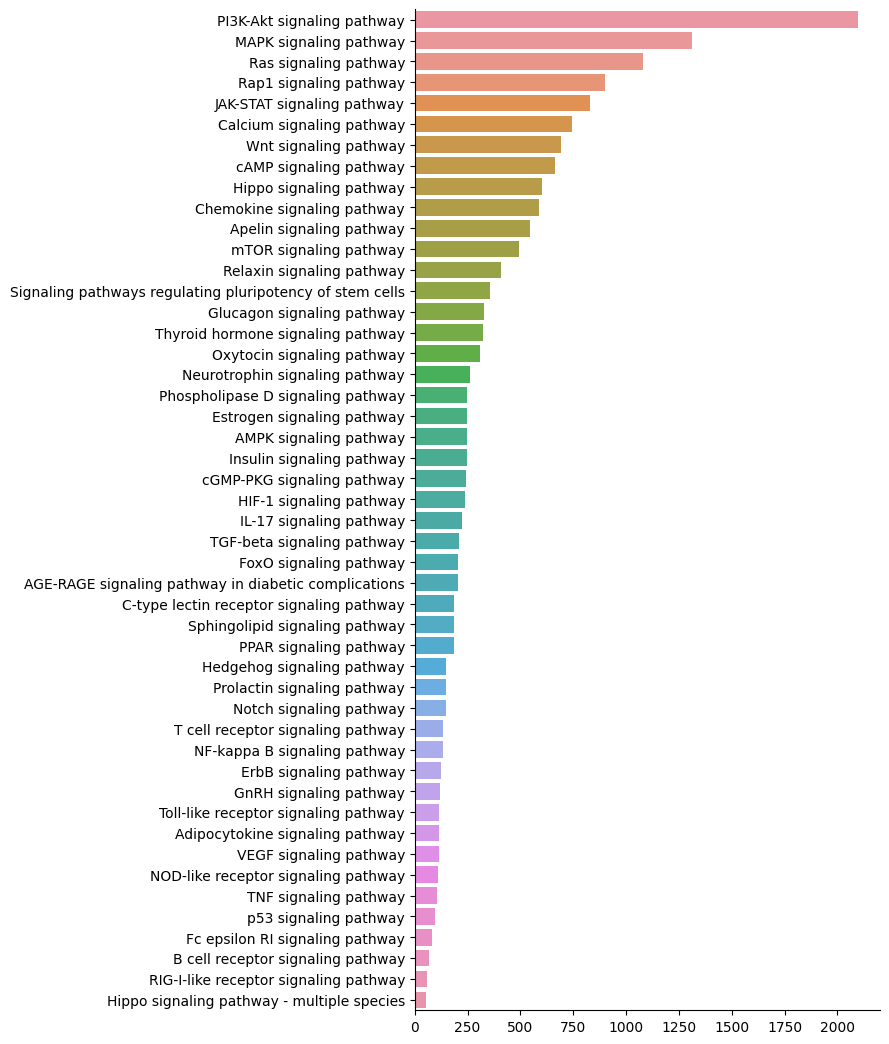

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

kegg_path_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_path_gene_interaction.csv')

# Count occurrences of each path
path_counts = kegg_path_df['path'].value_counts()

# Plot the data
plt.figure(figsize=(6, 13))
sns.barplot(y=path_counts.index, x=path_counts.values)  # Note the x and y parameter switch
# Removing the top and right spines
sns.despine(top=True, right=True)
# plt.xlabel('Count')
# plt.title('Count of each path in kegg_path_df')
plt.show()


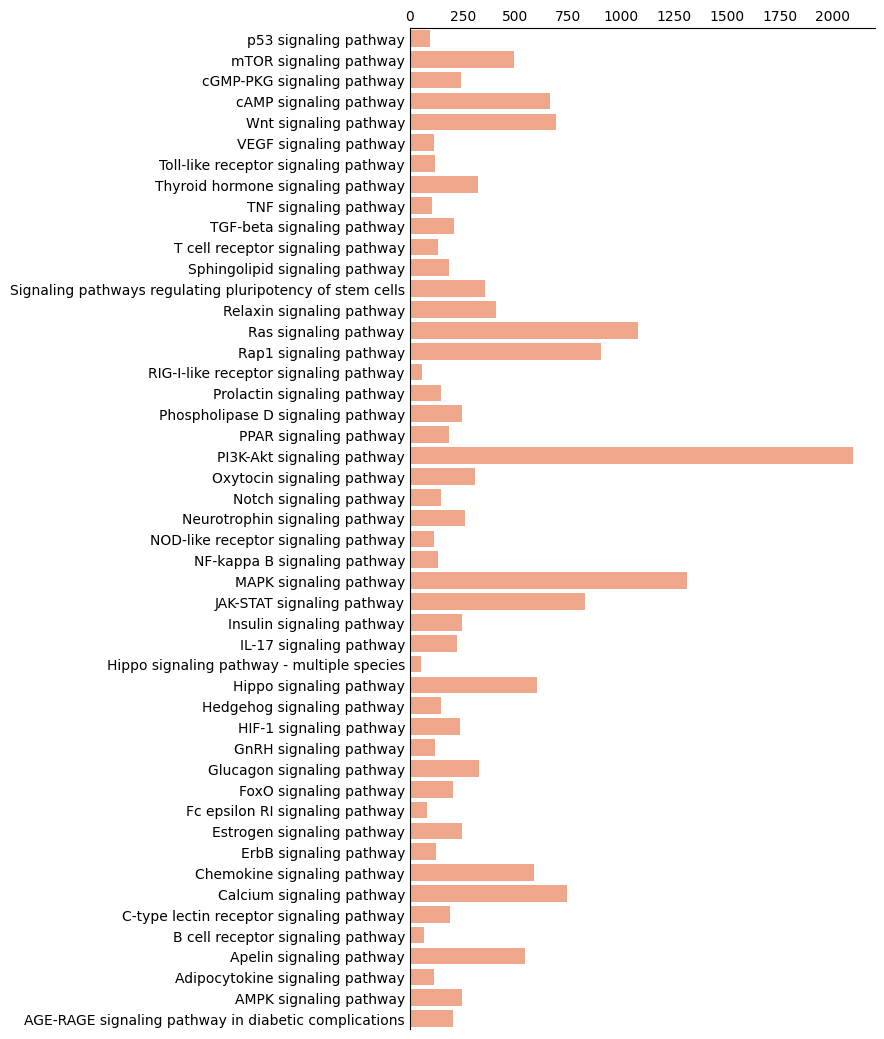

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

kegg_path_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_path_gene_interaction.csv')

# Count occurrences of each path
path_counts = kegg_path_df['path'].value_counts()

# Sort the index of path_counts in alphabetical order
path_counts = path_counts.sort_index(ascending=False)

# Plot the data
plt.figure(figsize=(6, 13))
ax = sns.barplot(y=path_counts.index, x=path_counts.values, color='lightsalmon')  # Note the x and y parameter switch
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='both', length=0)
# Removing the top and right spines
sns.despine(top=False, right=True, left=False, bottom=True)

# Display the plot
plt.show()

#### 2.2 Analysis of pathway distribution by sum weight

In [11]:
# CELL LINE LIST OF SUM
import pandas as pd
dataset = 'datainfo-nci'
dataname = 'nci'
fold_num = 0
cell_line_map_df = pd.read_csv('./' + dataset + '/filtered_data/cell_line_map_dict.csv')
cell_line_name_list = cell_line_map_df['Cell_Line_Name'].tolist()
cell_line_num = cell_line_map_df.shape[0]
allhop_sum_sp_concat_df_list = []
hop1_sum_sp_concat_df_list = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    fold_cell_path = './analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/cell' + str(cell_num) +'.csv'
    fold_cell_edge_df = pd.read_csv(fold_cell_path)
    # all_hop
    allhop_sum_sp_df = fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'sum'})
    allhop_sum_sp_df = allhop_sum_sp_df.sort_values(by=['Attention'], ascending=False)
    allhop_sum_sp_df['cell_line_name'] = [cell_line_name] * allhop_sum_sp_df.shape[0]
    allhop_sum_sp_df['cell_line_num'] = [cell_num] * allhop_sum_sp_df.shape[0]
    allhop_sum_sp_df['sum_rank'] = range(1, allhop_sum_sp_df.shape[0] + 1)
    allhop_sum_sp_concat_df_list.append(allhop_sum_sp_df)
    allhop_sum_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_cell' + str(cell_num) +'_sum.csv')
    # hop1
    hop1_fold_cell_edge_df = fold_cell_edge_df[fold_cell_edge_df['Hop'].isin(['hop1'])].reset_index(drop=True)
    hop1_sum_sp_df = hop1_fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'sum'})
    hop1_sum_sp_df = hop1_sum_sp_df.sort_values(by=['Attention'], ascending=False)
    hop1_sum_sp_df['cell_line_name'] = [cell_line_name] * hop1_sum_sp_df.shape[0]
    hop1_sum_sp_df['cell_line_num'] = [cell_num] * hop1_sum_sp_df.shape[0]
    hop1_sum_sp_df['sum_rank'] = range(1, hop1_sum_sp_df.shape[0] + 1)
    hop1_sum_sp_concat_df_list.append(hop1_sum_sp_df)
    hop1_sum_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_cell' + str(cell_num) +'_sum.csv')

allhop_sum_sp_concat_df = pd.concat(allhop_sum_sp_concat_df_list)
allhop_sum_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_sum.csv')
hop1_sum_sp_concat_df = pd.concat(hop1_sum_sp_concat_df_list)
hop1_sum_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_sum.csv')


##### 2.2.1 Hop1-sum

In [12]:
sortname_hop1_sum_sp_concat_df = hop1_sum_sp_concat_df.sort_values(by=['cell_line_num', 'SignalingPath'], ascending=True)
sortname_hop1_sum_sp_concat_df

,,Attention,cell_line_name,cell_line_num,sum_rank
SpNotation,SignalingPath,,,,
sp1,AGE-RAGE signaling pathway in diabetic complications,10.968538,A498,1,38
sp2,AMPK signaling pathway,12.328099,A498,1,31
sp3,Adipocytokine signaling pathway,9.753137,A498,1,41
sp4,Apelin signaling pathway,26.622211,A498,1,8
sp5,B cell receptor signaling pathway,20.127303,A498,1,18
...,...,...,...,...,...
sp44,Wnt signaling pathway,22.177647,UO-31,42,13
sp45,cAMP signaling pathway,24.515451,UO-31,42,10
sp46,cGMP-PKG signaling pathway,21.389161,UO-31,42,15


2016
2016
2016


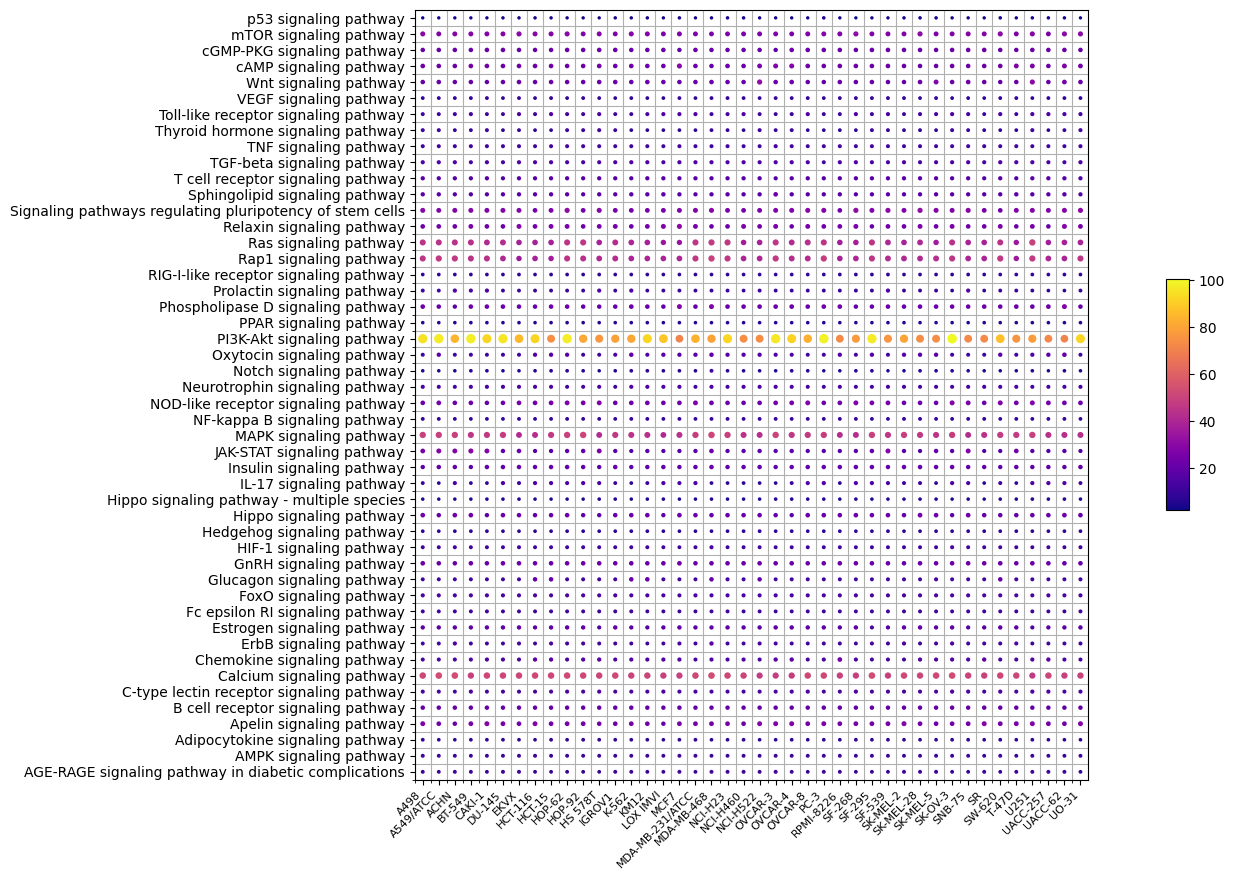

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
kegg_sp_map_list = kegg_sp_map_df['SignalingPath'].tolist()

cmap = 'plasma'
edge_att_list = sortname_hop1_sum_sp_concat_df['Attention'].tolist()

#retrieve unique labels
ylabels = kegg_sp_map_list
xlabels = cell_line_name_list
ylabels_num_list = list(np.arange(0, len(ylabels))) * len(xlabels)
xlabels_num_list = []
for i in range(len(xlabels)):
       xlabels_list = len(ylabels) * [i]
       xlabels_num_list = xlabels_num_list + xlabels_list
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(edge_att_list)
c = np.array(edge_att_list)

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
# plt.xticks(rotation=90)
ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
R = s/s.max()/5 + 0.1
print(len(xlabels_num_list))
print(len(ylabels_num_list))
print(len(R))
# R = s/s.max()/2
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
col = PatchCollection(circles, array=c, cmap=cmap)
ax.add_collection(col)
fig.colorbar(col, shrink=0.3, aspect=10)

#### 2.3 Analysis of pathway distribution by average weight

In [14]:
# CELL LINE LIST OF AVERAGE
import pandas as pd
dataset = 'datainfo-nci'
dataname = 'nci'
fold_num = 0
cell_line_map_df = pd.read_csv('./' + dataset + '/filtered_data/cell_line_map_dict.csv')
cell_line_name_list = cell_line_map_df['Cell_Line_Name'].tolist()
cell_line_num = cell_line_map_df.shape[0]
allhop_average_sp_concat_df_list = []
hop1_average_sp_concat_df_list = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    fold_cell_path = './analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/cell' + str(cell_num) +'.csv'
    fold_cell_edge_df = pd.read_csv(fold_cell_path)
    # all_hop
    allhop_average_sp_df = fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'mean'})
    allhop_average_sp_df = allhop_average_sp_df.sort_values(by=['Attention'], ascending=False)
    allhop_average_sp_df['cell_line_name'] = [cell_line_name] * allhop_average_sp_df.shape[0]
    allhop_average_sp_df['cell_line_num'] = [cell_num] * allhop_average_sp_df.shape[0]
    allhop_average_sp_df['mean_rank'] = range(1, allhop_average_sp_df.shape[0] + 1)
    allhop_average_sp_concat_df_list.append(allhop_average_sp_df)
    allhop_average_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_cell' + str(cell_num) +'_average.csv')
    # hop1
    hop1_fold_cell_edge_df = fold_cell_edge_df[fold_cell_edge_df['Hop'].isin(['hop1'])].reset_index(drop=True)
    hop1_average_sp_df = hop1_fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'mean'})
    hop1_average_sp_df = hop1_average_sp_df.sort_values(by=['Attention'], ascending=False)
    hop1_average_sp_df['cell_line_name'] = [cell_line_name] * hop1_average_sp_df.shape[0]
    hop1_average_sp_df['cell_line_num'] = [cell_num] * hop1_average_sp_df.shape[0]
    hop1_average_sp_df['mean_rank'] = range(1, hop1_average_sp_df.shape[0] + 1)
    hop1_average_sp_concat_df_list.append(hop1_average_sp_df)
    hop1_average_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_cell' + str(cell_num) +'_average.csv')

allhop_average_sp_concat_df = pd.concat(allhop_average_sp_concat_df_list)
allhop_average_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_average.csv')
hop1_average_sp_concat_df = pd.concat(hop1_average_sp_concat_df_list)
hop1_average_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_average.csv')

##### 2.3.1 Hop1-average

In [15]:
sortname_hop1_average_sp_concat_df = hop1_average_sp_concat_df.sort_values(by=['cell_line_num', 'SignalingPath'], ascending=True)
sortname_hop1_average_sp_concat_df

,,Attention,cell_line_name,cell_line_num,mean_rank
SpNotation,SignalingPath,,,,
sp1,AGE-RAGE signaling pathway in diabetic complications,0.026884,A498,1,29
sp2,AMPK signaling pathway,0.024956,A498,1,32
sp3,Adipocytokine signaling pathway,0.042777,A498,1,13
sp4,Apelin signaling pathway,0.024335,A498,1,34
sp5,B cell receptor signaling pathway,0.145850,A498,1,1
...,...,...,...,...,...
sp44,Wnt signaling pathway,0.016001,UO-31,42,45
sp45,cAMP signaling pathway,0.018488,UO-31,42,42
sp46,cGMP-PKG signaling pathway,0.043830,UO-31,42,12


2016
2016
2016


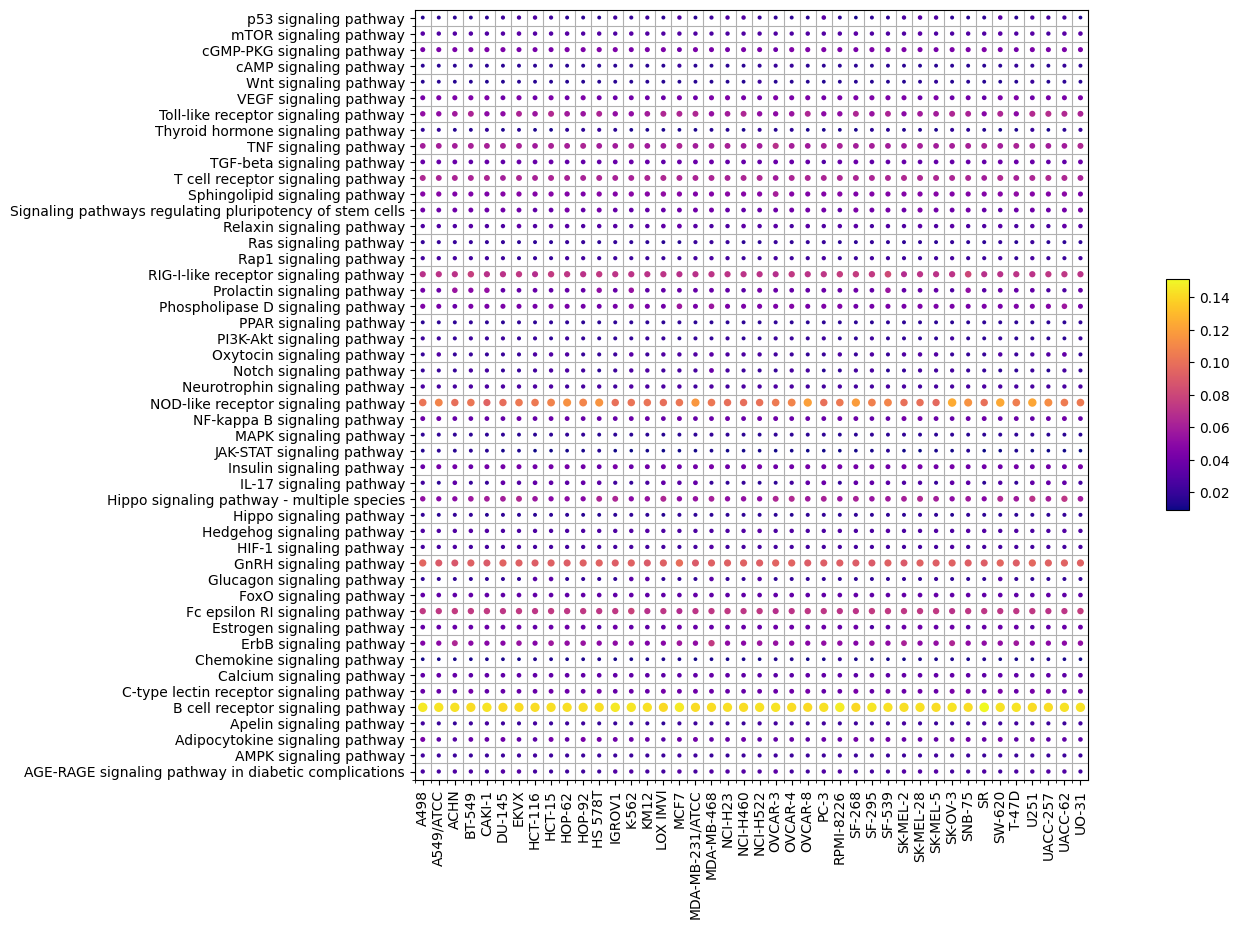

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
kegg_sp_map_list = kegg_sp_map_df['SignalingPath'].tolist()

cmap = 'plasma'
edge_att_list = sortname_hop1_average_sp_concat_df['Attention'].tolist()

#retrieve unique labels
ylabels = kegg_sp_map_list
xlabels = cell_line_name_list
ylabels_num_list = list(np.arange(0, len(ylabels))) * len(xlabels)
xlabels_num_list = []
for i in range(len(xlabels)):
       xlabels_list = len(ylabels) * [i]
       xlabels_num_list = xlabels_num_list + xlabels_list
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(edge_att_list)
c = np.array(edge_att_list)

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)
# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=90)
ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
R = s/s.max()/5 + 0.1
print(len(xlabels_num_list))
print(len(ylabels_num_list))
print(len(R))
# R = s/s.max()/2
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
col = PatchCollection(circles, array=c, cmap=cmap)
ax.add_collection(col)
fig.colorbar(col, shrink=0.3, aspect=10)

##### 2.3.2 All hops-average

In [17]:
sortname_allhop_average_sp_concat_df = allhop_average_sp_concat_df.sort_values(by=['cell_line_num', 'SignalingPath'], ascending=True)
sortname_allhop_average_sp_concat_df

,,Attention,cell_line_name,cell_line_num,mean_rank
SpNotation,SignalingPath,,,,
sp1,AGE-RAGE signaling pathway in diabetic complications,0.028156,A498,1,23
sp2,AMPK signaling pathway,0.024303,A498,1,30
sp3,Adipocytokine signaling pathway,0.038062,A498,1,14
sp4,Apelin signaling pathway,0.020117,A498,1,36
sp5,B cell receptor signaling pathway,0.126214,A498,1,1
...,...,...,...,...,...
sp44,Wnt signaling pathway,0.016840,UO-31,42,44
sp45,cAMP signaling pathway,0.016981,UO-31,42,43
sp46,cGMP-PKG signaling pathway,0.027346,UO-31,42,24


2016
2016
2016


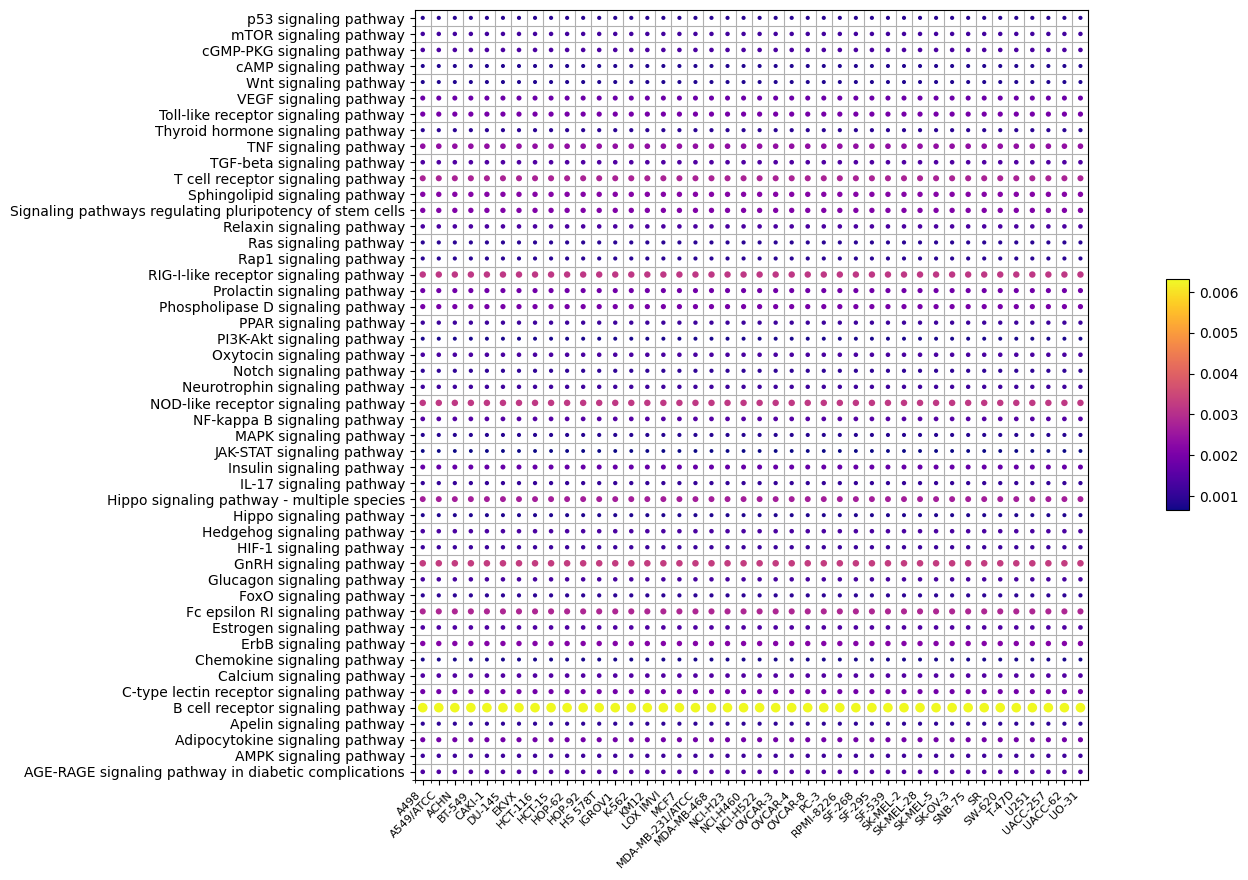

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
kegg_sp_map_list = kegg_sp_map_df['SignalingPath'].tolist()

cmap = 'plasma'
edge_att_list = sortname_allhop_average_sp_concat_df['Attention'].tolist()

#retrieve unique labels
ylabels = kegg_sp_map_list
xlabels = cell_line_name_list
ylabels_num_list = list(np.arange(0, len(ylabels))) * len(xlabels)
xlabels_num_list = []
for i in range(len(xlabels)):
       xlabels_list = len(ylabels) * [i]
       xlabels_num_list = xlabels_num_list + xlabels_list
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(edge_att_list) / 20
c = np.array(edge_att_list) / 20

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
# plt.xticks(rotation=90)
ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
R = s/s.max()/5 + 0.1
print(len(xlabels_num_list))
print(len(ylabels_num_list))
print(len(R))
# R = s/s.max()/2
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
col = PatchCollection(circles, array=c, cmap=cmap)
ax.add_collection(col)
fig.colorbar(col, shrink=0.3, aspect=10)

#### 2.4 Analysis of node filtered pathway distribution by average weight

In [19]:
all_cell_whole_idf_att_def_df = pd.read_csv('./analysis-nci/fold_0_cell/all_cell_whole_idf_att_deg.csv')
all_cell_whole_idf_att_def_df

,node_num,node_name,A498,A549/ATCC,ACHN,BT-549,CAKI-1,DU-145,EKVX,HCT-116,...,SK-OV-3,SNB-75,SR,SW-620,T-47D,U251,UACC-257,UACC-62,UO-31,freq
0,1,ABL1,1.776201,3.365605,1.850076,3.770506,1.659796,4.023256,3.401465,1.581062,...,2.074371,5.148063,3.232277,2.460672,2.161445,3.320331,1.848128,1.729911,1.985430,0.0
1,2,ABL2,1.045516,2.878986,1.137025,1.779553,0.977052,3.346703,2.705691,0.885347,...,1.522090,1.446822,2.608393,1.620031,1.539995,1.782138,1.095632,0.992600,1.241372,0.0
2,3,ACAA1,0.760690,0.804551,0.870271,0.835504,0.792524,0.773619,0.853299,0.818497,...,0.790445,0.719252,0.862398,0.846739,0.743034,0.886029,0.867841,0.805697,0.843813,0.0
3,4,ACACA,7.366749,9.263728,6.310849,8.150331,7.408879,7.126077,7.114383,8.352789,...,7.362552,8.236659,7.355350,8.246597,6.527518,7.416799,6.888236,7.261603,7.440402,0.0
4,5,ACADM,0.707142,0.775862,0.756865,0.746074,0.740295,0.724955,0.760522,0.748930,...,0.710128,0.671544,0.806583,0.777043,0.747727,0.777987,0.740481,0.813526,0.838825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1485,ZFYVE16,0.450426,0.703018,0.796337,0.411909,0.449430,0.361875,0.395726,0.382653,...,0.361077,0.445077,0.371858,0.386175,0.493236,0.447405,0.404605,0.403611,0.500218,0.0
1485,1486,ZFYVE9,0.447311,0.744572,0.826470,0.430828,0.464018,0.375633,0.366829,0.380153,...,0.359388,0.448934,0.430591,0.388348,0.513267,0.435171,0.431319,0.415670,0.504195,0.0
1486,1487,ZMAT3,0.122447,0.158475,0.138473,0.112732,0.135229,0.130034,0.191226,0.145157,...,0.193030,0.140387,0.157364,0.162371,0.163745,0.142724,0.147621,0.161164,0.092205,0.0
1487,1488,ZNF274,0.404017,0.370877,0.419943,0.431748,0.406697,0.429840,0.443773,0.394163,...,0.397791,0.341495,0.470482,0.416483,0.425190,0.426630,0.405644,0.422369,0.439950,0.0


In [20]:
# CELL LINE LIST OF AVERAGE
import pandas as pd
from analysis_apercentile import Percentile
fold_n = 0
dataset = 'datainfo-nci'
dataname = 'nci'
fold_num = 0
percentile = 99.5
cell_line_map_df = pd.read_csv('./' + dataset + '/filtered_data/cell_line_map_dict.csv')
cell_line_name_list = cell_line_map_df['Cell_Line_Name'].tolist()
cell_line_num = cell_line_map_df.shape[0]
all_cell_whole_idf_att_deg_df = pd.read_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/all_cell_whole_idf_att_deg.csv')

allhop_node_filtered_average_sp_concat_df_list = []
hop1_node_filtered_average_sp_concat_df_list = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    fold_cell_path = './analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/cell' + str(cell_num) +'.csv'
    fold_cell_edge_df = pd.read_csv(fold_cell_path)
    # filtering
    all_cell_node_percentile, cell_node_percentile = Percentile().gene_compute(n_fold=fold_n, whole_net=True, cell_num=cell_num, percentile=percentile)
    node_filtered_all_cell_whole_idf_att_deg_df = all_cell_whole_idf_att_deg_df[all_cell_whole_idf_att_deg_df[cell_line_name]>=cell_node_percentile].reset_index(drop=True)
    node_filtered_gene_list = node_filtered_all_cell_whole_idf_att_deg_df['node_num'].tolist()
    # print(len(node_filtered_gene_list))
    node_filtered_fold_cell_edge_df = fold_cell_edge_df[fold_cell_edge_df['From'].isin(node_filtered_gene_list)].reset_index(drop=True)
    node_filtered_fold_cell_edge_df = node_filtered_fold_cell_edge_df[node_filtered_fold_cell_edge_df['To'].isin(node_filtered_gene_list)].reset_index(drop=True)
    # all_hop
    allhop_node_filtered_average_sp_df = node_filtered_fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'mean'})
    # print(allhop_node_filtered_average_sp_df.shape)
    allhop_node_filtered_average_sp_df = allhop_node_filtered_average_sp_df.sort_values(by=['Attention'], ascending=False)
    allhop_node_filtered_average_sp_df['cell_line_name'] = [cell_line_name] * allhop_node_filtered_average_sp_df.shape[0]
    allhop_node_filtered_average_sp_df['cell_line_num'] = [cell_num] * allhop_node_filtered_average_sp_df.shape[0]
    allhop_node_filtered_average_sp_df['mean_rank'] = range(1, allhop_node_filtered_average_sp_df.shape[0] + 1)
    allhop_node_filtered_average_sp_concat_df_list.append(allhop_node_filtered_average_sp_df)
    allhop_node_filtered_average_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_node_filtered_cell' + str(cell_num) +'_average.csv')
    # hop1
    hop1_node_filtered_fold_cell_edge_df = node_filtered_fold_cell_edge_df[node_filtered_fold_cell_edge_df['Hop'].isin(['hop1'])].reset_index(drop=True)
    hop1_node_filtered_average_sp_df = hop1_node_filtered_fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'mean'})
    # print(hop1_node_filtered_average_sp_df.shape)
    hop1_node_filtered_average_sp_df = hop1_node_filtered_average_sp_df.sort_values(by=['Attention'], ascending=False)
    hop1_node_filtered_average_sp_df['cell_line_name'] = [cell_line_name] * hop1_node_filtered_average_sp_df.shape[0]
    hop1_node_filtered_average_sp_df['cell_line_num'] = [cell_num] * hop1_node_filtered_average_sp_df.shape[0]
    hop1_node_filtered_average_sp_df['mean_rank'] = range(1, hop1_node_filtered_average_sp_df.shape[0] + 1)
    hop1_node_filtered_average_sp_concat_df_list.append(hop1_node_filtered_average_sp_df)
    hop1_node_filtered_average_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_node_filtered_cell' + str(cell_num) +'_average.csv')

allhop_node_filtered_average_sp_concat_df = pd.concat(allhop_node_filtered_average_sp_concat_df_list)
allhop_node_filtered_average_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_node_filtered_average.csv')
hop1_node_filtered_average_sp_concat_df = pd.concat(hop1_node_filtered_average_sp_concat_df_list)
hop1_node_filtered_average_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_node_filtered_average.csv')


/Users/muhaha/opt/anaconda3/envs/mac_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### 2.4.1 Hop1-average-node-filtered

In [21]:
hop1_node_filtered_average_sp_concat_df.head(20)

,,Attention,cell_line_name,cell_line_num,mean_rank
SpNotation,SignalingPath,,,,
sp16,Hedgehog signaling pathway,1.000000,A498,1,1
sp24,NOD-like receptor signaling pathway,0.531225,A498,1,2
sp7,Calcium signaling pathway,0.443781,A498,1,3
sp37,Sphingolipid signaling pathway,0.398341,A498,1,4
sp32,RIG-I-like receptor signaling pathway,0.367821,A498,1,5
sp46,cGMP-PKG signaling pathway,0.348765,A498,1,6
sp5,B cell receptor signaling pathway,0.244390,A498,1,7
sp33,Rap1 signaling pathway,0.169773,A498,1,8
sp29,PPAR signaling pathway,0.144573,A498,1,9


In [22]:
sortname_hop1_average_sp_concat_df = hop1_average_sp_concat_df.sort_values(by=['cell_line_num', 'SignalingPath'], ascending=True)
sortname_hop1_nan_sp_concat_df = sortname_hop1_average_sp_concat_df.copy()
display(sortname_hop1_nan_sp_concat_df)

,,Attention,cell_line_name,cell_line_num,mean_rank
SpNotation,SignalingPath,,,,
sp1,AGE-RAGE signaling pathway in diabetic complications,0.026884,A498,1,29
sp2,AMPK signaling pathway,0.024956,A498,1,32
sp3,Adipocytokine signaling pathway,0.042777,A498,1,13
sp4,Apelin signaling pathway,0.024335,A498,1,34
sp5,B cell receptor signaling pathway,0.145850,A498,1,1
...,...,...,...,...,...
sp44,Wnt signaling pathway,0.016001,UO-31,42,45
sp45,cAMP signaling pathway,0.018488,UO-31,42,42
sp46,cGMP-PKG signaling pathway,0.043830,UO-31,42,12


In [23]:
# Perform the left join
dataname = 'nci'
fold_num = 0
merged_df = sortname_hop1_nan_sp_concat_df.merge(hop1_node_filtered_average_sp_concat_df, on=['SpNotation', 'cell_line_name'], how='left')
merged_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_node_filtered_average.csv')
hop1_node_filtered_average_df = pd.read_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_node_filtered_average.csv')
hop1_node_filtered_average_df = hop1_node_filtered_average_df[['SpNotation', 'cell_line_name', 'Attention_y']]
hop1_node_filtered_average_df = hop1_node_filtered_average_df.rename(columns={'Attention_y': 'Attention'})
hop1_node_filtered_average_df = hop1_node_filtered_average_df.fillna(0)
display(hop1_node_filtered_average_df)
kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
hop1_node_filtered_average_join_df = hop1_node_filtered_average_df.merge(kegg_sp_map_df, on=['SpNotation'], how='left')
display(hop1_node_filtered_average_join_df.head(20))
display(hop1_node_filtered_average_join_df)

,SpNotation,cell_line_name,Attention
0,sp1,A498,0.000000
1,sp2,A498,0.079967
2,sp3,A498,0.023801
3,sp4,A498,0.008100
4,sp5,A498,0.244390
...,...,...,...
2011,sp44,UO-31,0.018098
2012,sp45,UO-31,0.000000
2013,sp46,UO-31,0.000000
2014,sp47,UO-31,0.000000


,SpNotation,cell_line_name,Attention,SignalingPath
0,sp1,A498,0.000000,AGE-RAGE signaling pathway in diabetic complic...
1,sp2,A498,0.079967,AMPK signaling pathway
2,sp3,A498,0.023801,Adipocytokine signaling pathway
3,sp4,A498,0.008100,Apelin signaling pathway
4,sp5,A498,0.244390,B cell receptor signaling pathway
5,sp6,A498,0.024448,C-type lectin receptor signaling pathway
6,sp7,A498,0.443781,Calcium signaling pathway
7,sp8,A498,0.000000,Chemokine signaling pathway
8,sp9,A498,0.000000,ErbB signaling pathway
9,sp10,A498,0.000000,Estrogen signaling pathway


,SpNotation,cell_line_name,Attention,SignalingPath
0,sp1,A498,0.000000,AGE-RAGE signaling pathway in diabetic complic...
1,sp2,A498,0.079967,AMPK signaling pathway
2,sp3,A498,0.023801,Adipocytokine signaling pathway
3,sp4,A498,0.008100,Apelin signaling pathway
4,sp5,A498,0.244390,B cell receptor signaling pathway
...,...,...,...,...
2011,sp44,UO-31,0.018098,Wnt signaling pathway
2012,sp45,UO-31,0.000000,cAMP signaling pathway
2013,sp46,UO-31,0.000000,cGMP-PKG signaling pathway
2014,sp47,UO-31,0.000000,mTOR signaling pathway


2016
2016
2016


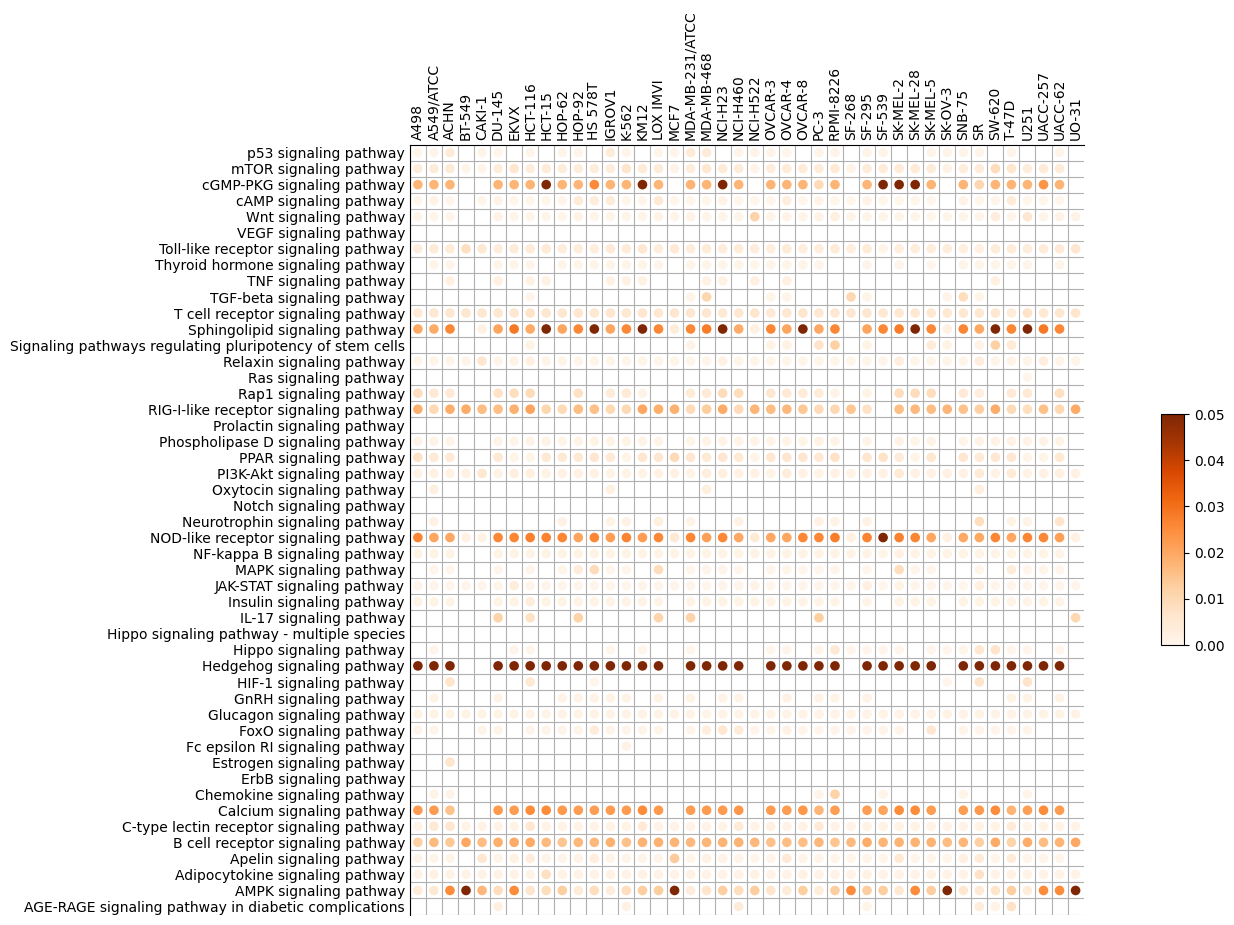

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
kegg_sp_map_list = kegg_sp_map_df['SignalingPath'].tolist()

cmap = 'plasma'
edge_att_list = hop1_node_filtered_average_join_df['Attention'].tolist()

#retrieve unique labels
ylabels = kegg_sp_map_list
xlabels = cell_line_name_list
ylabels_num_list = list(np.arange(0, len(ylabels))) * len(xlabels)
xlabels_num_list = []
for i in range(len(xlabels)):
       xlabels_list = len(ylabels) * [i]
       xlabels_num_list = xlabels_num_list + xlabels_list
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(edge_att_list) / 20
c = np.array(edge_att_list) / 20

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.xaxis.tick_top()
ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)
# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=90)
ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
R = s/s.max()/5
# R[R != 0] += 0.2
R[R != 0] = 0.3
print(len(xlabels_num_list))
print(len(ylabels_num_list))
print(len(R))
# R = s/s.max()/2
sns.despine(left=False, bottom=True, top=False, right=True)
# Remove lines from xticks and yticks
ax.tick_params(axis='both', which='both', length=0)
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
cmap = 'Oranges'
col = PatchCollection(circles, array=c, cmap=cmap)
ax.add_collection(col)
fig.colorbar(col, shrink=0.3, aspect=10)

###### 2.4.1.1 Percentile filtering

In [25]:
hop1_node_filtered_att_array = np.array(hop1_node_filtered_average_sp_concat_df['Attention'].tolist())
percentile = 95
hop1_node_filtered_percentile = np.percentile(hop1_node_filtered_att_array, percentile)
print('Hop1 node percentile: ', hop1_node_filtered_percentile)

percentile_cell_hop1_node_filtered_average_join_dflist = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_node_filtered_average_join_df = hop1_node_filtered_average_join_df[hop1_node_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    percentile_cell_hop1_node_filtered_average_join_df = cell_hop1_node_filtered_average_join_df[cell_hop1_node_filtered_average_join_df['Attention'] >= hop1_node_filtered_percentile].reset_index(drop=True)
    print(percentile_cell_hop1_node_filtered_average_join_df.shape)
    percentile_cell_hop1_node_filtered_average_join_dflist.append(percentile_cell_hop1_node_filtered_average_join_df)

percentile_cell_hop1_node_filtered_average_join_concat_df = pd.concat(percentile_cell_hop1_node_filtered_average_join_dflist)
percentile_cell_hop1_node_filtered_average_join_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_node_plots/percentile_hop1_node_filtered_average.csv', index=False)
print(percentile_cell_hop1_node_filtered_average_join_concat_df.shape)

Hop1 node percentile:  0.5343495935600001
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(0, 4)
(1, 4)
(2, 4)
(2, 4)
(3, 4)
(1, 4)
(1, 4)
(2, 4)
(1, 4)
(2, 4)
(3, 4)
(1, 4)
(1, 4)
(1, 4)
(2, 4)
(3, 4)
(1, 4)
(0, 4)
(1, 4)
(1, 4)
(2, 4)
(1, 4)
(2, 4)
(0, 4)
(1, 4)
(3, 4)
(4, 4)
(3, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(2, 4)
(1, 4)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(62, 4)


###### 2.4.1.2 Aux Percentile filtering

In [26]:
aux_percentile_cell_hop1_node_filtered_average_join_dflist = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_node_filtered_average_join_df = hop1_node_filtered_average_join_df[hop1_node_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    percentile_cell_hop1_node_filtered_average_join_df = cell_hop1_node_filtered_average_join_df[cell_hop1_node_filtered_average_join_df['Attention'] >= hop1_node_filtered_percentile].reset_index(drop=True)
    sort_cell_hop1_node_filtered_average_join_df = cell_hop1_node_filtered_average_join_df.sort_values(by=['Attention'], ascending=False)
    print(percentile_cell_hop1_node_filtered_average_join_df.shape)
    if percentile_cell_hop1_node_filtered_average_join_df.shape[0] == 0:
        percentile_cell_hop1_node_filtered_average_join_df = sort_cell_hop1_node_filtered_average_join_df.head(1)
    aux_percentile_cell_hop1_node_filtered_average_join_dflist.append(percentile_cell_hop1_node_filtered_average_join_df)

aux_percentile_cell_hop1_node_filtered_average_join_concat_df = pd.concat(aux_percentile_cell_hop1_node_filtered_average_join_dflist)
aux_percentile_cell_hop1_node_filtered_average_join_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_node_plots/percentile_aux_hop1_node_filtered_average.csv', index=False)
print(aux_percentile_cell_hop1_node_filtered_average_join_concat_df.shape)

(1, 4)
(1, 4)
(1, 4)
(1, 4)
(0, 4)
(1, 4)
(2, 4)
(2, 4)
(3, 4)
(1, 4)
(1, 4)
(2, 4)
(1, 4)
(2, 4)
(3, 4)
(1, 4)
(1, 4)
(1, 4)
(2, 4)
(3, 4)
(1, 4)
(0, 4)
(1, 4)
(1, 4)
(2, 4)
(1, 4)
(2, 4)
(0, 4)
(1, 4)
(3, 4)
(4, 4)
(3, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(2, 4)
(1, 4)
(2, 4)
(2, 4)
(1, 4)
(1, 4)
(65, 4)


###### 2.4.1.2 Head 5 signaling pathways

In [27]:

top5_cell_hop1_node_filtered_average_join_dflist = []

for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_node_filtered_average_join_df = hop1_node_filtered_average_join_df[hop1_node_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    sort_cell_hop1_node_filtered_average_join_df = cell_hop1_node_filtered_average_join_df.sort_values(by=['Attention'], ascending=False)
    top5_cell_hop1_node_filtered_average_join_df = sort_cell_hop1_node_filtered_average_join_df.head(5)
    top5_cell_hop1_node_filtered_average_join_dflist.append(top5_cell_hop1_node_filtered_average_join_df)

top5_cell_hop1_node_filtered_average_join_concat_df = pd.concat(top5_cell_hop1_node_filtered_average_join_dflist)
top5_cell_hop1_node_filtered_average_join_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_node_plots/top5_hop1_node_filtered_average.csv', index=False)


###### 2.4.1.3 Plots

In [ ]:
import os
if os.path.exists('./analysis-nci/fold_0_cell/sp_node_plots') == False:
    os.mkdir('./analysis-nci/fold_0_cell/sp_node_plots')

for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_node_filtered_average_join_df = hop1_node_filtered_average_join_df[hop1_node_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    # print(cell_hop1_node_filtered_average_join_df.head(5))
    
    # Create a barplot
    plt.figure(figsize=(10, 10))
    sns.barplot(x='Attention', y='SignalingPath', data=cell_hop1_node_filtered_average_join_df, color='lightsalmon')
    
    plt.title(cell_line_name + ' Hop1 Edge Signaling Pathway Weights')
    plt.xlabel('Edge Weight')  # Adjust this label as per your 'value_column'
    plt.ylabel('Cell Line Name')
    plt.tight_layout()
    plt.savefig('./analysis-nci/fold_0_cell/sp_node_plots/cell_' + str(cell_num) + '_hop1_node_filtered_sp.png', dpi=600)
    
    # plt.show()

#### 2.5 Analysis of edge filtered pathway distribution by average weight

In [29]:
import pandas as pd
import numpy as np
fold_n = 0
# edge_threshold = 0.31
### CELL LINE LIST
cell_line_map_df = pd.read_csv('./datainfo-nci/filtered_data/cell_line_map_dict.csv')
cell_line_num = cell_line_map_df.shape[0]
cell_line_map_dict = dict(zip(cell_line_map_df.Cell_Line_Num, cell_line_map_df.Cell_Line_Name))

all_cell_edge_df = pd.read_csv('./analysis-nci/fold_' + str(fold_n) + '_cell/all_cell_edge.csv')

percentile = 98.5
# REWEIGHTED ALL CELL EDGES
cell_line_list = list(cell_line_map_df['Cell_Line_Name'])
all_cell_edge_value_df = all_cell_edge_df[cell_line_list]
all_cell_edge_matrix = all_cell_edge_value_df.values
all_cell_edge_attention = np.copy(all_cell_edge_matrix)
all_cell_edge_array = all_cell_edge_matrix.flatten()
print('ALL CELL EDGES ' + str(percentile) + ' PERCENTILE: ' , np.percentile(all_cell_edge_array, percentile))
edge_percentile_number = np.percentile(all_cell_edge_array, percentile)

ALL CELL EDGES 98.5 PERCENTILE:  0.3302625608199981


In [30]:
# CELL LINE LIST OF AVERAGE
import pandas as pd
dataset = 'datainfo-nci'
dataname = 'nci'
fold_num = 0
edge_threshold = edge_percentile_number

cell_line_map_df = pd.read_csv('./' + dataset + '/filtered_data/cell_line_map_dict.csv')
cell_line_name_list = cell_line_map_df['Cell_Line_Name'].tolist()
cell_line_num = cell_line_map_df.shape[0]
all_cell_edge_df = pd.read_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/all_cell_edge.csv')

allhop_edge_filtered_average_sp_concat_df_list = []
hop1_edge_filtered_average_sp_concat_df_list = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    fold_cell_path = './analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/cell' + str(cell_num) +'.csv'
    fold_cell_edge_df = pd.read_csv(fold_cell_path)
    # filtering
    this_cell_edge_df = all_cell_edge_df[['From', 'To', cell_line_name, 'SignalingPath', 'SpNotation']]
    edge_filtered_this_cell_edge_df = this_cell_edge_df[this_cell_edge_df[cell_line_name]>=edge_threshold].reset_index(drop=True)
    edge_filtered_gene_from_list = edge_filtered_this_cell_edge_df['From'].tolist()
    edge_filtered_gene_to_list = edge_filtered_this_cell_edge_df['To'].tolist()
    edge_filtered_gene_list = edge_filtered_gene_from_list + edge_filtered_gene_to_list
    edge_filtered_fold_cell_edge_df = fold_cell_edge_df[fold_cell_edge_df['From'].isin(edge_filtered_gene_list)].reset_index(drop=True)
    edge_filtered_fold_cell_edge_df = edge_filtered_fold_cell_edge_df[edge_filtered_fold_cell_edge_df['To'].isin(edge_filtered_gene_list)].reset_index(drop=True)
    # all_hop
    allhop_edge_filtered_average_sp_df = edge_filtered_fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'mean'})
    allhop_edge_filtered_average_sp_df = allhop_edge_filtered_average_sp_df.sort_values(by=['Attention'], ascending=False)
    allhop_edge_filtered_average_sp_df['cell_line_name'] = [cell_line_name] * allhop_edge_filtered_average_sp_df.shape[0]
    allhop_edge_filtered_average_sp_df['cell_line_num'] = [cell_num] * allhop_edge_filtered_average_sp_df.shape[0]
    allhop_edge_filtered_average_sp_df['mean_rank'] = range(1, allhop_edge_filtered_average_sp_df.shape[0] + 1)
    allhop_edge_filtered_average_sp_concat_df_list.append(allhop_edge_filtered_average_sp_df)
    allhop_edge_filtered_average_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_edge_filtered_cell' + str(cell_num) +'_average.csv')
    # hop1
    hop1_edge_filtered_fold_cell_edge_df = edge_filtered_fold_cell_edge_df[fold_cell_edge_df['Hop'].isin(['hop1'])].reset_index(drop=True)
    hop1_edge_filtered_average_sp_df = hop1_edge_filtered_fold_cell_edge_df.groupby(['SpNotation', 'SignalingPath']).agg({'Attention': 'mean'})
    hop1_edge_filtered_average_sp_df = hop1_edge_filtered_average_sp_df.sort_values(by=['Attention'], ascending=False)
    hop1_edge_filtered_average_sp_df['cell_line_name'] = [cell_line_name] * hop1_edge_filtered_average_sp_df.shape[0]
    hop1_edge_filtered_average_sp_df['cell_line_num'] = [cell_num] * hop1_edge_filtered_average_sp_df.shape[0]
    hop1_edge_filtered_average_sp_df['mean_rank'] = range(1, hop1_edge_filtered_average_sp_df.shape[0] + 1)
    hop1_edge_filtered_average_sp_concat_df_list.append(hop1_edge_filtered_average_sp_df)
    hop1_edge_filtered_average_sp_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_edge_filtered_cell' + str(cell_num) +'_average.csv')

allhop_edge_filtered_average_sp_concat_df = pd.concat(allhop_edge_filtered_average_sp_concat_df_list)
allhop_edge_filtered_average_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/allhop_edge_filtered_average.csv')
hop1_edge_filtered_average_sp_concat_df = pd.concat(hop1_edge_filtered_average_sp_concat_df_list)
hop1_edge_filtered_average_sp_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_edge_filtered_average.csv')

/var/folders/_4/lbj70xyx0kdgdb7l6hvks8qh0000gn/T/ipykernel_6514/4227761229.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hop1_edge_filtered_fold_cell_edge_df = edge_filtered_fold_cell_edge_df[fold_cell_edge_df['Hop'].isin(['hop1'])].reset_index(drop=True)


In [31]:
hop1_edge_filtered_average_sp_concat_df

,,Attention,cell_line_name,cell_line_num,mean_rank
SpNotation,SignalingPath,,,,
sp24,NOD-like receptor signaling pathway,0.059797,A498,1,1
sp11,Fc epsilon RI signaling pathway,0.049912,A498,1,2
sp31,Prolactin signaling pathway,0.047008,A498,1,3
sp40,TNF signaling pathway,0.041572,A498,1,4
sp46,cGMP-PKG signaling pathway,0.041270,A498,1,5
...,...,...,...,...,...
sp12,FoxO signaling pathway,0.015898,UO-31,42,26
sp8,Chemokine signaling pathway,0.015825,UO-31,42,27
sp21,JAK-STAT signaling pathway,0.014338,UO-31,42,28


##### 2.5.1 Hop1-average-edge-filtered

In [32]:
sortname_hop1_average_sp_concat_df = hop1_average_sp_concat_df.sort_values(by=['cell_line_num', 'SignalingPath'], ascending=True)
display(sortname_hop1_average_sp_concat_df.head(10))
sortname_hop1_nan_sp_concat_df = sortname_hop1_average_sp_concat_df.copy()
# Perform the left join
dataname = 'nci'
fold_num = 0
merged_df = sortname_hop1_nan_sp_concat_df.merge(hop1_edge_filtered_average_sp_concat_df, on=['SpNotation', 'cell_line_name'], how='left')
merged_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_edge_filtered_average.csv')
hop1_edge_filtered_average_df = pd.read_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/hop1_edge_filtered_average.csv')
hop1_edge_filtered_average_df = hop1_edge_filtered_average_df[['SpNotation', 'cell_line_name', 'Attention_y']]
hop1_edge_filtered_average_df = hop1_edge_filtered_average_df.rename(columns={'Attention_y': 'Attention'})
hop1_edge_filtered_average_df = hop1_edge_filtered_average_df.fillna(0)
display(hop1_edge_filtered_average_df.head(5))
kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
hop1_edge_filtered_average_join_df = hop1_edge_filtered_average_df.merge(kegg_sp_map_df, on=['SpNotation'], how='left')
display(hop1_edge_filtered_average_join_df.head(5))

,,Attention,cell_line_name,cell_line_num,mean_rank
SpNotation,SignalingPath,,,,
sp1,AGE-RAGE signaling pathway in diabetic complications,0.026884,A498,1,29
sp2,AMPK signaling pathway,0.024956,A498,1,32
sp3,Adipocytokine signaling pathway,0.042777,A498,1,13
sp4,Apelin signaling pathway,0.024335,A498,1,34
sp5,B cell receptor signaling pathway,0.145850,A498,1,1
sp6,C-type lectin receptor signaling pathway,0.037599,A498,1,20
sp7,Calcium signaling pathway,0.035023,A498,1,24
sp8,Chemokine signaling pathway,0.011366,A498,1,48
sp9,ErbB signaling pathway,0.046414,A498,1,11


,SpNotation,cell_line_name,Attention
0,sp1,A498,0.025449
1,sp2,A498,0.017848
2,sp3,A498,0.030930
3,sp4,A498,0.021801
4,sp5,A498,0.000000


,SpNotation,cell_line_name,Attention,SignalingPath
0,sp1,A498,0.025449,AGE-RAGE signaling pathway in diabetic complic...
1,sp2,A498,0.017848,AMPK signaling pathway
2,sp3,A498,0.030930,Adipocytokine signaling pathway
3,sp4,A498,0.021801,Apelin signaling pathway
4,sp5,A498,0.000000,B cell receptor signaling pathway


In [33]:
hop1_edge_filtered_average_join_df

,SpNotation,cell_line_name,Attention,SignalingPath
0,sp1,A498,0.025449,AGE-RAGE signaling pathway in diabetic complic...
1,sp2,A498,0.017848,AMPK signaling pathway
2,sp3,A498,0.030930,Adipocytokine signaling pathway
3,sp4,A498,0.021801,Apelin signaling pathway
4,sp5,A498,0.000000,B cell receptor signaling pathway
...,...,...,...,...
2011,sp44,UO-31,0.010856,Wnt signaling pathway
2012,sp45,UO-31,0.017518,cAMP signaling pathway
2013,sp46,UO-31,0.031878,cGMP-PKG signaling pathway
2014,sp47,UO-31,0.026858,mTOR signaling pathway


In [34]:
cell_line_cancer_name_map_dict_df = pd.read_csv('./datainfo-nci/filtered_data/cell_line_cancer_name_map_dict.csv')
hop1_edge_filtered_average_join_merge_df = pd.merge(hop1_edge_filtered_average_join_df, cell_line_cancer_name_map_dict_df, left_on='cell_line_name', right_on='Cell_Line_Name', how='left')
hop1_edge_filtered_average_join_merge_df = hop1_edge_filtered_average_join_merge_df[['SpNotation', 'Cell_Line_Name', 'Attention', 'SignalingPath', 'Cancer_name']]
hop1_edge_filtered_average_join_merge_df.to_csv('./analysis-nci/fold_0_cell/hop1_edge_filtered_average_join_merge.csv', index=False)
hop1_edge_filtered_average_join_merge_df

,SpNotation,Cell_Line_Name,Attention,SignalingPath,Cancer_name
0,sp1,A498,0.025449,AGE-RAGE signaling pathway in diabetic complic...,Renal
1,sp2,A498,0.017848,AMPK signaling pathway,Renal
2,sp3,A498,0.030930,Adipocytokine signaling pathway,Renal
3,sp4,A498,0.021801,Apelin signaling pathway,Renal
4,sp5,A498,0.000000,B cell receptor signaling pathway,Renal
...,...,...,...,...,...
2011,sp44,UO-31,0.010856,Wnt signaling pathway,Renal
2012,sp45,UO-31,0.017518,cAMP signaling pathway,Renal
2013,sp46,UO-31,0.031878,cGMP-PKG signaling pathway,Renal
2014,sp47,UO-31,0.026858,mTOR signaling pathway,Renal


2016
2016
2016


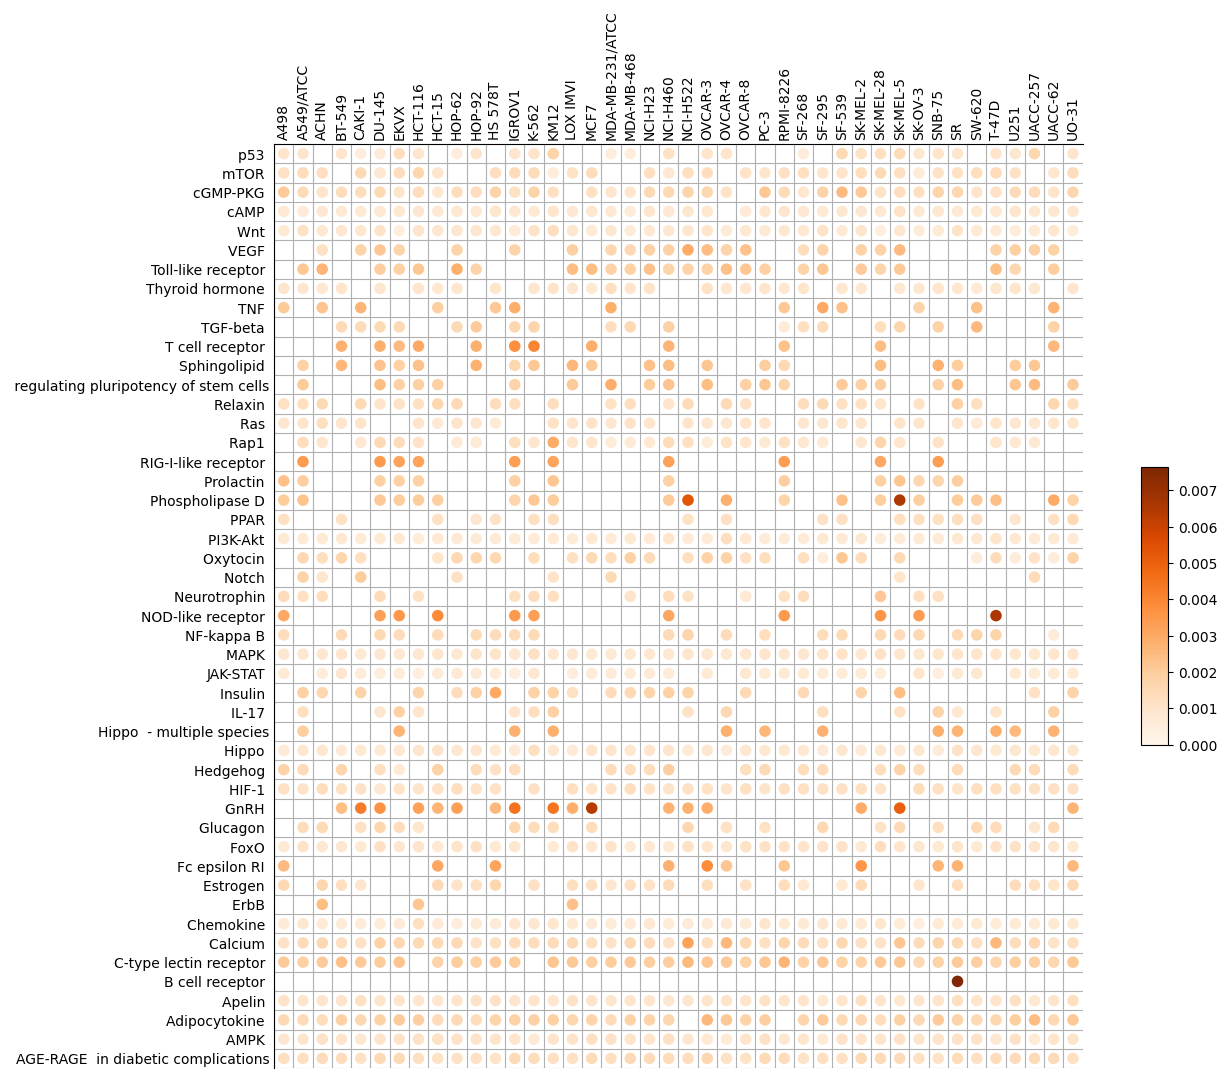

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd

kegg_sp_map_df = pd.read_csv('./datainfo-nci/filtered_data/kegg_sp_map.csv')
kegg_sp_map_list = kegg_sp_map_df['SignalingPath'].tolist()
new_kegg_sp_map_list = [item.replace('signaling pathway', '').replace('Signaling pathways', '') for item in kegg_sp_map_list]

cmap = 'plasma'
edge_att_list = hop1_edge_filtered_average_join_df['Attention'].tolist()

#retrieve unique labels
ylabels = new_kegg_sp_map_list
xlabels = cell_line_name_list
ylabels_num_list = list(np.arange(0, len(ylabels))) * len(xlabels)
xlabels_num_list = []
for i in range(len(xlabels)):
       xlabels_list = len(ylabels) * [i]
       xlabels_num_list = xlabels_num_list + xlabels_list
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(edge_att_list) / 20
c = np.array(edge_att_list) / 20

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(15, 12))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.xaxis.tick_top()
ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)
# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=90)
ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
R = s/s.max()/5
# R[R != 0] += 0.2
R[R != 0] = 0.3
print(len(xlabels_num_list))
print(len(ylabels_num_list))
print(len(R))
# R = s/s.max()/2
sns.despine(left=False, bottom=True, top=False, right=True)
# Remove lines from xticks and yticks
ax.tick_params(axis='both', which='both', length=0)
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
cmap = 'Oranges'
col = PatchCollection(circles, array=c, cmap=cmap)
ax.add_collection(col)
fig.colorbar(col, shrink=0.3, aspect=10)
plt.savefig('./output.png', dpi=600)

###### 2.5.1.1 Percentile filtering

In [ ]:
hop1_edge_filtered_average_sp_concat_df

In [ ]:
hop1_edge_filtered_att_array = np.array(hop1_edge_filtered_average_sp_concat_df['Attention'].tolist())
percentile = 95
hop1_edge_filtered_percentile = np.percentile(hop1_edge_filtered_att_array, percentile)
print('Hop1 edge percentile: ', hop1_edge_filtered_percentile)

percentile_cell_hop1_edge_filtered_average_join_dflist = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_edge_filtered_average_join_df = hop1_edge_filtered_average_join_df[hop1_edge_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    percentile_cell_hop1_edge_filtered_average_join_df = cell_hop1_edge_filtered_average_join_df[cell_hop1_edge_filtered_average_join_df['Attention'] >= hop1_edge_filtered_percentile].reset_index(drop=True)
    print(percentile_cell_hop1_edge_filtered_average_join_df.shape)
    percentile_cell_hop1_edge_filtered_average_join_dflist.append(percentile_cell_hop1_edge_filtered_average_join_df)

percentile_cell_hop1_edge_filtered_average_join_concat_df = pd.concat(percentile_cell_hop1_edge_filtered_average_join_dflist)
percentile_cell_hop1_edge_filtered_average_join_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_edge_plots/percentile_hop1_edge_filtered_average.csv', index=False)

###### 2.5.1.2 Aux Percentile filtering

In [ ]:
aux_percentile_cell_hop1_edge_filtered_average_join_dflist = []
for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_edge_filtered_average_join_df = hop1_edge_filtered_average_join_df[hop1_edge_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    percentile_cell_hop1_edge_filtered_average_join_df = cell_hop1_edge_filtered_average_join_df[cell_hop1_edge_filtered_average_join_df['Attention'] >= hop1_edge_filtered_percentile].reset_index(drop=True)
    sort_cell_hop1_edge_filtered_average_join_df = cell_hop1_edge_filtered_average_join_df.sort_values(by=['Attention'], ascending=False)
    print(sort_cell_hop1_edge_filtered_average_join_df)
    if percentile_cell_hop1_edge_filtered_average_join_df.shape[0] == 0:
        percentile_cell_hop1_edge_filtered_average_join_df = sort_cell_hop1_edge_filtered_average_join_df.head(1)
    aux_percentile_cell_hop1_edge_filtered_average_join_dflist.append(percentile_cell_hop1_edge_filtered_average_join_df)

aux_percentile_cell_hop1_edge_filtered_average_join_concat_df = pd.concat(aux_percentile_cell_hop1_edge_filtered_average_join_dflist)
aux_percentile_cell_hop1_edge_filtered_average_join_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_edge_plots/percentile_aux_hop1_edge_filtered_average.csv', index=False)

###### 2.5.1.3 Head 5 signaling pathways

In [ ]:

top5_cell_hop1_edge_filtered_average_join_dflist = []

for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_edge_filtered_average_join_df = hop1_edge_filtered_average_join_df[hop1_edge_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    sort_cell_hop1_edge_filtered_average_join_df = cell_hop1_edge_filtered_average_join_df.sort_values(by=['Attention'], ascending=False)
    top5_cell_hop1_edge_filtered_average_join_df = sort_cell_hop1_edge_filtered_average_join_df.head(5)
    top5_cell_hop1_edge_filtered_average_join_dflist.append(top5_cell_hop1_edge_filtered_average_join_df)

top5_cell_hop1_edge_filtered_average_join_concat_df = pd.concat(top5_cell_hop1_edge_filtered_average_join_dflist)
top5_cell_hop1_edge_filtered_average_join_concat_df.to_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_edge_plots/top5_hop1_edge_filtered_average.csv', index=False)

###### 2.5.1.4 Plots

In [ ]:
import os
if os.path.exists('./analysis-nci/fold_0_cell/sp_edge_plots') == False:
    os.mkdir('./analysis-nci/fold_0_cell/sp_edge_plots')

for cell_num in range(1, cell_line_num + 1):
    cell_line_name = cell_line_name_list[cell_num - 1]
    cell_hop1_edge_filtered_average_join_df = hop1_edge_filtered_average_join_df[hop1_edge_filtered_average_join_df['cell_line_name'].isin([cell_line_name])].reset_index(drop=True)
    print(cell_hop1_edge_filtered_average_join_df)
    
    # Create a barplot
    plt.figure(figsize=(10, 10))
    sns.barplot(x='Attention', y='SignalingPath', data=cell_hop1_edge_filtered_average_join_df, color='lightsalmon')
    
    plt.title(cell_line_name + ' Hop1 Edge Signaling Pathway Weights')
    plt.xlabel('Edge Weight')  # Adjust this label as per your 'value_column'
    plt.ylabel('Cell Line Name')
    plt.tight_layout()
    plt.savefig('./analysis-nci/fold_0_cell/sp_edge_plots/cell_' + str(cell_num) + '_hop1_edge_filtered_sp.png', dpi=600)
    
    # plt.show()

### 3. Pathway circos plot

In [127]:
dataname = 'nci'
fold_num = 0
import pandas as pd

aux_percentile_cell_hop1_edge_filtered_average_join_concat_df = pd.read_csv('./analysis-' + dataname + '/fold_' + str(fold_num) + '_cell/sp_edge_plots/percentile_aux_hop1_edge_filtered_average.csv')
aux_percentile_cell_hop1_edge_filtered_average_join_concat_df

,SpNotation,cell_line_name,Attention,SignalingPath
0,sp24,A498,0.059797,NOD-like receptor signaling pathway
1,sp32,A549/ATCC,0.067414,RIG-I-like receptor signaling pathway
2,sp42,ACHN,0.053643,Toll-like receptor signaling pathway
3,sp38,BT-549,0.055750,T cell receptor signaling pathway
4,sp14,CAKI-1,0.085286,GnRH signaling pathway
...,...,...,...,...
71,sp24,T-47D,0.131370,NOD-like receptor signaling pathway
72,sp18,U251,0.051196,Hippo signaling pathway - multiple species
73,sp36,UACC-257,0.049972,Signaling pathways regulating pluripotency of ...
74,sp30,UACC-62,0.059137,Phospholipase D signaling pathway


### Pathway circos plot-2

### 4. Gene analysis

#### 4.1 Intersected genes over same cancer cell lines

In [39]:
all_cell_whole_idf_att_def_df = pd.read_csv('./analysis-nci/fold_0_cell/all_cell_whole_idf_att_deg.csv')
all_cell_whole_idf_att_def_df

,node_num,node_name,A498,A549/ATCC,ACHN,BT-549,CAKI-1,DU-145,EKVX,HCT-116,...,SK-OV-3,SNB-75,SR,SW-620,T-47D,U251,UACC-257,UACC-62,UO-31,freq
0,1,ABL1,1.776201,3.365605,1.850076,3.770506,1.659796,4.023256,3.401465,1.581062,...,2.074371,5.148063,3.232277,2.460672,2.161445,3.320331,1.848128,1.729911,1.985430,0.0
1,2,ABL2,1.045516,2.878986,1.137025,1.779553,0.977052,3.346703,2.705691,0.885347,...,1.522090,1.446822,2.608393,1.620031,1.539995,1.782138,1.095632,0.992600,1.241372,0.0
2,3,ACAA1,0.760690,0.804551,0.870271,0.835504,0.792524,0.773619,0.853299,0.818497,...,0.790445,0.719252,0.862398,0.846739,0.743034,0.886029,0.867841,0.805697,0.843813,0.0
3,4,ACACA,7.366749,9.263728,6.310849,8.150331,7.408879,7.126077,7.114383,8.352789,...,7.362552,8.236659,7.355350,8.246597,6.527518,7.416799,6.888236,7.261603,7.440402,0.0
4,5,ACADM,0.707142,0.775862,0.756865,0.746074,0.740295,0.724955,0.760522,0.748930,...,0.710128,0.671544,0.806583,0.777043,0.747727,0.777987,0.740481,0.813526,0.838825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1485,ZFYVE16,0.450426,0.703018,0.796337,0.411909,0.449430,0.361875,0.395726,0.382653,...,0.361077,0.445077,0.371858,0.386175,0.493236,0.447405,0.404605,0.403611,0.500218,0.0
1485,1486,ZFYVE9,0.447311,0.744572,0.826470,0.430828,0.464018,0.375633,0.366829,0.380153,...,0.359388,0.448934,0.430591,0.388348,0.513267,0.435171,0.431319,0.415670,0.504195,0.0
1486,1487,ZMAT3,0.122447,0.158475,0.138473,0.112732,0.135229,0.130034,0.191226,0.145157,...,0.193030,0.140387,0.157364,0.162371,0.163745,0.142724,0.147621,0.161164,0.092205,0.0
1487,1488,ZNF274,0.404017,0.370877,0.419943,0.431748,0.406697,0.429840,0.443773,0.394163,...,0.397791,0.341495,0.470482,0.416483,0.425190,0.426630,0.405644,0.422369,0.439950,0.0


In [40]:
cell_line_cancer_name_map_dict_df = pd.read_csv('./datainfo-nci/filtered_data/cell_line_cancer_name_map_dict.csv')
cell_line_cancer_name_map_dict_df

,Cell_Line_Name,Cell_Line_Num,Cancer_name
0,A498,1,Renal
1,A549/ATCC,2,Lung
2,ACHN,3,Renal
3,BT-549,4,Breast
4,CAKI-1,5,Renal
5,DU-145,6,Prostate
6,EKVX,7,Lung
7,HCT-116,8,Colon
8,HCT-15,9,Colon
9,HOP-62,10,Lung


In [41]:
def get_overlapping_genes_for_cancer(cancer_cell_line_top_gene_dict):
    # Get the cell lines associated with the cancer name
    cancer_cell_lines = [key for key, value in cancer_cell_line_top_gene_dict.items()]
    # Convert the list of genes for each cell line to a set
    gene_sets = [set(cancer_cell_line_top_gene_dict[cell_line]) for cell_line in cancer_cell_lines]
    print('CANCER CELL LINES: ', cancer_cell_lines)
    # Find the intersection of all sets
    overlapping_genes = set.intersection(*gene_sets)
    return cancer_cell_lines, overlapping_genes

In [42]:
cancer_name_list = list(set(cell_line_cancer_name_map_dict_df.Cancer_name.to_list()))
top_number = 20

cell_line_orders = []
cancer_overlapped_gene_dict = {}
for cancer_name in cancer_name_list:
    cancer_cell_line_top_gene_dict = {}
    cancer_cell_line_cancer_name_map_dict_df = cell_line_cancer_name_map_dict_df[cell_line_cancer_name_map_dict_df['Cancer_name'] == cancer_name]
    cancer_cell_line_list = cancer_cell_line_cancer_name_map_dict_df.Cell_Line_Name.to_list()
    for cell_line_name in cancer_cell_line_list:
        this_cell_whole_idf_att_def_df = all_cell_whole_idf_att_def_df[['node_name', cell_line_name]]
        this_sort_cell_whole_idf_att_def_df = this_cell_whole_idf_att_def_df.sort_values(by=[cell_line_name], ascending=False)
        this_top_cell_whole_idf_att_def_df = this_sort_cell_whole_idf_att_def_df.head(top_number)
        this_top_cell_whole_idf_att_def_list = this_top_cell_whole_idf_att_def_df.node_name.to_list()
        cancer_cell_line_top_gene_dict[cell_line_name] = this_top_cell_whole_idf_att_def_list
    print('CANCER NAME: ' + cancer_name)
    cancer_cell_lines, overlapping_genes = get_overlapping_genes_for_cancer(cancer_cell_line_top_gene_dict)
    cell_line_orders.append(cancer_cell_lines)
    print('OVERLAPPED GENES: ', overlapping_genes)
    cancer_overlapped_gene_dict[cancer_name] = list(overlapping_genes)

CANCER NAME: Melanoma
CANCER CELL LINES:  ['LOX IMVI', 'SK-MEL-2', 'SK-MEL-28', 'SK-MEL-5', 'UACC-257', 'UACC-62']
OVERLAPPED GENES:  {'IFNAR1', 'MAP2K7', 'CAMK2G', 'LEPR', 'BCL10', 'GNG10'}
CANCER NAME: Lung
CANCER CELL LINES:  ['A549/ATCC', 'EKVX', 'HOP-62', 'HOP-92', 'NCI-H23', 'NCI-H460', 'NCI-H522']
OVERLAPPED GENES:  {'GSK3B', 'IFNAR1', 'MAP2K7', 'LEPR', 'FOXO1'}
CANCER NAME: Prostate
CANCER CELL LINES:  ['DU-145', 'PC-3']
OVERLAPPED GENES:  {'GSK3B', 'LEP', 'IFNAR1', 'MAP2K7', 'CAMK2D', 'LEPR', 'PTEN', 'NTF3', 'TRAF6', 'MAP2K4', 'FOXO1', 'EFNA4', 'BCL10', 'GNG10', 'MALT1'}
CANCER NAME: Renal
CANCER CELL LINES:  ['A498', 'ACHN', 'CAKI-1', 'UO-31']
OVERLAPPED GENES:  {'IFNAR1', 'MAP2K7', 'LEPR', 'FOXO1', 'MALT1'}
CANCER NAME: Ovarian
CANCER CELL LINES:  ['IGROV1', 'OVCAR-3', 'OVCAR-4', 'OVCAR-8', 'SK-OV-3']
OVERLAPPED GENES:  {'LEP', 'LEPR', 'IFNAR1', 'MALT1'}
CANCER NAME: Leukemia
CANCER CELL LINES:  ['K-562', 'RPMI-8226', 'SR']
OVERLAPPED GENES:  {'IFNAR1', 'MAP2K7', 'CAMK2G', '

In [43]:
all_genes_union = set()

for genes in cancer_cell_line_top_gene_dict.values():
    all_genes_union = all_genes_union.union(genes)

# If you want the result as a list
all_genes_union_list = list(all_genes_union)
print(all_genes_union_list)

['GSK3B', 'MYLK3', 'COL1A2', 'WNT2', 'WNT3A', 'CXCL14', 'FOXO1', 'NF2', 'CAMK4', 'IL6ST', 'MALT1', 'LEP', 'CHRM1', 'NTF4', 'BIRC2', 'COL1A1', 'CAMK2G', 'SMAD4', 'TSC2', 'NTF3', 'TRAF6', 'SCD', 'BDNF', 'WNT1', 'WNT2B', 'BCL10', 'GNG10', 'WNT10A', 'IRF3', 'WNT10B', 'CAMK2D', 'WNT9B', 'LEPR', 'WNT16', 'NPPB', 'JAK3', 'WNT4', 'IFNAR1', 'MAP2K7', 'TBK1', 'PTEN', 'TCF7', 'WNT9A', 'HIF1A', 'SFRP1', 'BCL2', 'EFNA4', 'RPS6KA5', 'WNT11']


#### 4.1 Gene Analysis Plots

In [94]:
unique_all_cell_whole_idf_att_def_df = all_cell_whole_idf_att_def_df[all_cell_whole_idf_att_def_df['node_name'].isin(all_genes_union_list)]
plot_unique_all_cell_whole_idf_att_def_df = unique_all_cell_whole_idf_att_def_df.drop(['node_num', 'freq'], axis=1).reset_index(drop=True)
cell_line_order_flattened_list = ['node_name'] + [item for sublist in cell_line_orders for item in sublist]
print(cell_line_order_flattened_list)
plot_unique_all_cell_whole_idf_att_def_df = plot_unique_all_cell_whole_idf_att_def_df[cell_line_order_flattened_list]
plot_unique_all_cell_whole_idf_att_def_df

['node_name', 'LOX IMVI', 'SK-MEL-2', 'SK-MEL-28', 'SK-MEL-5', 'UACC-257', 'UACC-62', 'A549/ATCC', 'EKVX', 'HOP-62', 'HOP-92', 'NCI-H23', 'NCI-H460', 'NCI-H522', 'DU-145', 'PC-3', 'A498', 'ACHN', 'CAKI-1', 'UO-31', 'IGROV1', 'OVCAR-3', 'OVCAR-4', 'OVCAR-8', 'SK-OV-3', 'K-562', 'RPMI-8226', 'SR', 'HCT-116', 'HCT-15', 'KM12', 'SW-620', 'BT-549', 'HS 578T', 'MCF7', 'MDA-MB-231/ATCC', 'MDA-MB-468', 'T-47D', 'SF-268', 'SF-295', 'SF-539', 'SNB-75', 'U251']


,node_name,LOX IMVI,SK-MEL-2,SK-MEL-28,SK-MEL-5,UACC-257,UACC-62,A549/ATCC,EKVX,HOP-62,...,HS 578T,MCF7,MDA-MB-231/ATCC,MDA-MB-468,T-47D,SF-268,SF-295,SF-539,SNB-75,U251
0,BCL10,21.479495,22.790653,23.771408,22.341837,20.559977,22.122998,22.707284,21.988343,22.235433,...,20.890123,23.329817,21.469260,22.666162,22.826406,20.401620,23.491143,22.971124,20.884493,20.712804
1,BCL2,19.474521,20.311209,18.766077,20.703542,20.353599,21.088455,18.527344,21.933898,20.782645,...,25.313877,19.190516,17.577735,23.458064,22.429818,21.333922,18.592070,26.316294,24.026857,24.631885
2,BDNF,11.417070,19.469386,18.297200,14.658163,13.118866,12.569201,19.982589,12.131949,20.570653,...,12.099975,11.606549,20.504692,23.834708,17.679239,10.169906,21.205449,17.371703,15.771974,19.981488
3,BIRC2,4.064132,4.133723,4.020715,3.785846,3.832196,3.931189,5.219417,26.043790,4.892740,...,7.394592,4.167601,6.135448,3.748834,5.212075,25.453762,12.376652,4.304896,6.256213,4.674529
4,CAMK2D,25.198118,24.054265,24.620723,24.909757,25.718216,20.704461,24.323018,20.590030,25.601483,...,20.038415,19.535716,24.951895,26.134334,23.066918,20.963553,24.354163,20.892426,20.760449,20.568469
5,CAMK2G,24.248174,24.510158,24.994834,24.662648,25.675106,22.962223,25.004555,20.872526,23.508199,...,21.045373,17.090331,24.416559,22.751855,19.156134,21.375710,24.321395,20.899268,21.803695,21.634639
6,CAMK4,19.578822,21.124632,20.524649,21.002508,21.840902,17.866943,22.324042,19.060337,22.251125,...,16.732039,15.433451,23.119173,23.117240,18.284654,18.978100,22.103304,18.209920,18.276894,19.082602
7,CHRM1,17.397034,20.065832,20.639838,18.885862,18.186764,22.028442,17.623650,17.622100,18.233873,...,17.269919,21.360053,17.518471,17.229040,21.152492,17.622625,20.971672,18.765245,17.962763,20.579296
8,COL1A1,3.638410,3.080117,2.887295,2.785721,2.980955,2.796976,4.180506,3.821301,6.134068,...,27.619207,2.920565,2.784616,3.223531,2.650074,26.506580,3.337994,27.395984,1.888469,1.527088
9,COL1A2,5.738083,4.360877,4.381190,3.961114,3.848972,3.928048,6.210280,6.168225,4.680392,...,1.087640,4.252819,3.805706,4.838636,4.228282,1.485897,4.586756,1.079221,36.458963,4.871957


['node_name', 'LOX IMVI', 'SK-MEL-2', 'SK-MEL-28', 'SK-MEL-5', 'UACC-257', 'UACC-62', 'A549/ATCC', 'EKVX', 'HOP-62', 'HOP-92', 'NCI-H23', 'NCI-H460', 'NCI-H522', 'DU-145', 'PC-3', 'A498', 'ACHN', 'CAKI-1', 'UO-31', 'IGROV1', 'OVCAR-3', 'OVCAR-4', 'OVCAR-8', 'SK-OV-3', 'K-562', 'RPMI-8226', 'SR', 'HCT-116', 'HCT-15', 'KM12', 'SW-620', 'BT-549', 'HS 578T', 'MCF7', 'MDA-MB-231/ATCC', 'MDA-MB-468', 'T-47D', 'SF-268', 'SF-295', 'SF-539', 'SNB-75', 'U251']


/var/folders/_4/lbj70xyx0kdgdb7l6hvks8qh0000gn/T/ipykernel_6514/2040193512.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(col, shrink=0.3, aspect=10, orientation='vertical')


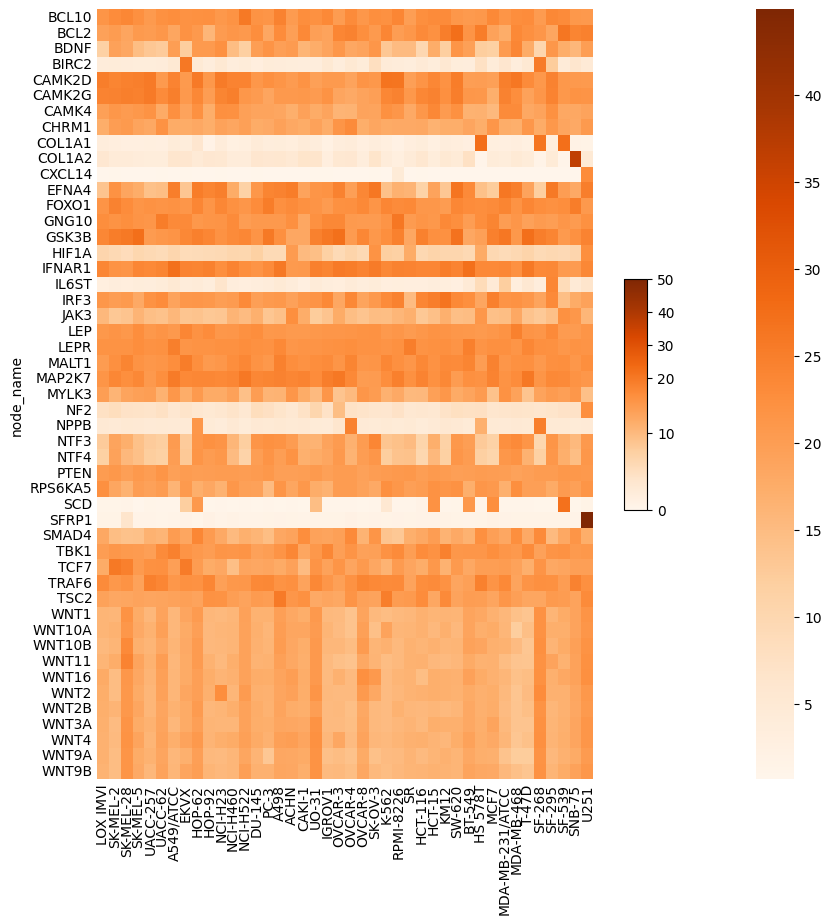

In [101]:
unique_all_cell_whole_idf_att_def_df = all_cell_whole_idf_att_def_df[all_cell_whole_idf_att_def_df['node_name'].isin(all_genes_union_list)]
plot_unique_all_cell_whole_idf_att_def_df = unique_all_cell_whole_idf_att_def_df.drop(['node_num', 'freq'], axis=1).reset_index(drop=True)
cell_line_order_flattened_list = ['node_name'] + [item for sublist in cell_line_orders for item in sublist]
print(cell_line_order_flattened_list)
plot_unique_all_cell_whole_idf_att_def_df = plot_unique_all_cell_whole_idf_att_def_df[cell_line_order_flattened_list]
plot_unique_all_cell_whole_idf_att_def_df

from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(10, 10))
# Assuming the first column's name is 'ylabel_column_name'
plot_unique_all_cell_whole_idf_att_def_df.set_index('node_name', inplace=True)
norm = TwoSlopeNorm(vmin=0, vmax=50, vcenter=15)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)

# Remove lines from xticks and yticks
ax.tick_params(axis='both', which='both', length=0)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)
sns.heatmap(plot_unique_all_cell_whole_idf_att_def_df, cmap='Oranges', annot=False)
fig.colorbar(col, shrink=0.3, aspect=10, orientation='vertical')

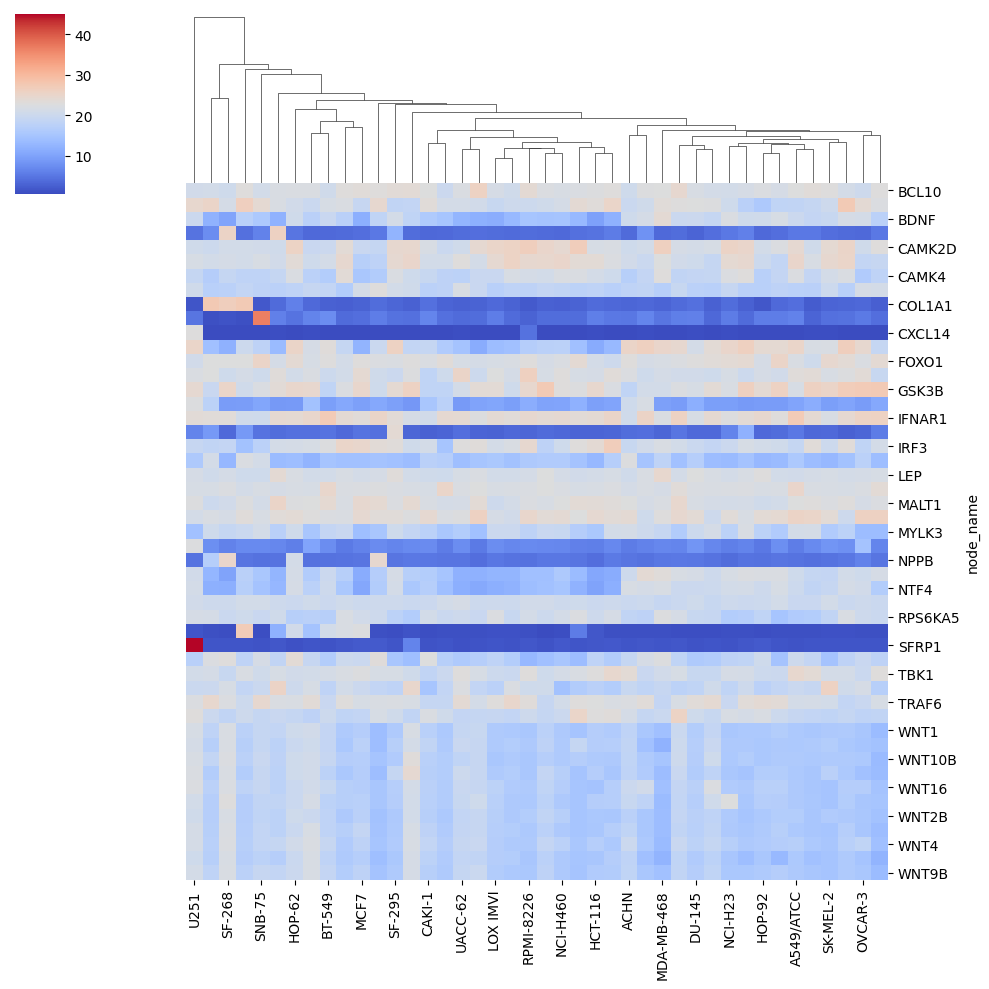

In [126]:
# Create a clustered heatmap
sns.clustermap(plot_unique_all_cell_whole_idf_att_def_df, method='average', col_cluster=True, row_cluster=False, cmap='coolwarm')

# Show the plot
plt.show()

In [122]:
cancer_name_list = list(set(cell_line_cancer_name_map_dict_df.Cancer_name.to_list()))
top_number = 20

plot_unique_all_cell_whole_idf_att_def_dflist = []
cell_line_orders = []
count = 0
cancer_overlapped_gene_dict = {}
for cancer_name in cancer_name_list:
    cancer_cell_line_top_gene_dict = {}
    cancer_cell_line_cancer_name_map_dict_df = cell_line_cancer_name_map_dict_df[cell_line_cancer_name_map_dict_df['Cancer_name'] == cancer_name]
    cancer_cell_line_list = cancer_cell_line_cancer_name_map_dict_df.Cell_Line_Name.to_list()
    for cell_line_name in cancer_cell_line_list:
        this_cell_whole_idf_att_def_df = all_cell_whole_idf_att_def_df[['node_name', cell_line_name]]
        this_sort_cell_whole_idf_att_def_df = this_cell_whole_idf_att_def_df.sort_values(by=[cell_line_name], ascending=False)
        this_top_cell_whole_idf_att_def_df = this_sort_cell_whole_idf_att_def_df.head(top_number)
        this_top_cell_whole_idf_att_def_list = this_top_cell_whole_idf_att_def_df.node_name.to_list()
        cancer_cell_line_top_gene_dict[cell_line_name] = this_top_cell_whole_idf_att_def_list
    print('CANCER NAME: ' + cancer_name)
    cancer_cell_lines, overlapping_genes = get_overlapping_genes_for_cancer(cancer_cell_line_top_gene_dict)
    tmp_plot_unique_all_cell_whole_idf_att_def_df = plot_unique_all_cell_whole_idf_att_def_df[cancer_cell_lines]
    count += 1
    count_str ='gap' + str(count)
    tmp_plot_unique_all_cell_whole_idf_att_def_df.insert(len(cancer_cell_lines), count_str, np.nan)
    plot_unique_all_cell_whole_idf_att_def_dflist.append(tmp_plot_unique_all_cell_whole_idf_att_def_df)
    cell_line_orders.append(cancer_cell_lines)
    print('OVERLAPPED GENES: ', overlapping_genes)
    cancer_overlapped_gene_dict[cancer_name] = list(overlapping_genes)

all_plot_unique_all_cell_whole_idf_att_def_df = pd.concat(plot_unique_all_cell_whole_idf_att_def_dflist, axis=1)
all_plot_unique_all_cell_whole_idf_att_def_df.to_csv('./analysis-nci/fold_0_cell/all_plot_unique_all_cell_whole_idf_att_def_df.csv', index=True)
all_plot_unique_all_cell_whole_idf_att_def_df = pd.read_csv('./analysis-nci/fold_0_cell/all_plot_unique_all_cell_whole_idf_att_def_df.csv')
all_plot_unique_all_cell_whole_idf_att_def_df.set_index('node_name', inplace=True)
display(all_plot_unique_all_cell_whole_idf_att_def_df)

CANCER NAME: Melanoma
CANCER CELL LINES:  ['LOX IMVI', 'SK-MEL-2', 'SK-MEL-28', 'SK-MEL-5', 'UACC-257', 'UACC-62']
OVERLAPPED GENES:  {'IFNAR1', 'MAP2K7', 'CAMK2G', 'LEPR', 'BCL10', 'GNG10'}
CANCER NAME: Lung
CANCER CELL LINES:  ['A549/ATCC', 'EKVX', 'HOP-62', 'HOP-92', 'NCI-H23', 'NCI-H460', 'NCI-H522']
OVERLAPPED GENES:  {'GSK3B', 'IFNAR1', 'MAP2K7', 'LEPR', 'FOXO1'}
CANCER NAME: Prostate
CANCER CELL LINES:  ['DU-145', 'PC-3']
OVERLAPPED GENES:  {'GSK3B', 'LEP', 'IFNAR1', 'MAP2K7', 'CAMK2D', 'LEPR', 'PTEN', 'NTF3', 'TRAF6', 'MAP2K4', 'FOXO1', 'EFNA4', 'BCL10', 'GNG10', 'MALT1'}
CANCER NAME: Renal
CANCER CELL LINES:  ['A498', 'ACHN', 'CAKI-1', 'UO-31']
OVERLAPPED GENES:  {'IFNAR1', 'MAP2K7', 'LEPR', 'FOXO1', 'MALT1'}
CANCER NAME: Ovarian
CANCER CELL LINES:  ['IGROV1', 'OVCAR-3', 'OVCAR-4', 'OVCAR-8', 'SK-OV-3']
OVERLAPPED GENES:  {'LEP', 'LEPR', 'IFNAR1', 'MALT1'}
CANCER NAME: Leukemia
CANCER CELL LINES:  ['K-562', 'RPMI-8226', 'SR']
OVERLAPPED GENES:  {'IFNAR1', 'MAP2K7', 'CAMK2G', '

,LOX IMVI,SK-MEL-2,SK-MEL-28,SK-MEL-5,UACC-257,UACC-62,gap1,A549/ATCC,EKVX,HOP-62,...,MDA-MB-231/ATCC,MDA-MB-468,T-47D,gap8,SF-268,SF-295,SF-539,SNB-75,U251,gap9
node_name,,,,,,,,,,,,,,,,,,,,,
BCL10,21.479495,22.790653,23.771408,22.341837,20.559977,22.122998,NaN,22.707284,21.988343,22.235433,...,21.469260,22.666162,22.826406,NaN,20.401620,23.491143,22.971124,20.884493,20.712804,NaN
BCL2,19.474521,20.311209,18.766077,20.703542,20.353599,21.088455,NaN,18.527344,21.933898,20.782645,...,17.577735,23.458064,22.429818,NaN,21.333922,18.592070,26.316294,24.026857,24.631885,NaN
BDNF,11.417070,19.469386,18.297200,14.658163,13.118866,12.569201,NaN,19.982589,12.131949,20.570653,...,20.504692,23.834708,17.679239,NaN,10.169906,21.205449,17.371703,15.771974,19.981488,NaN
BIRC2,4.064132,4.133723,4.020715,3.785846,3.832196,3.931189,NaN,5.219417,26.043790,4.892740,...,6.135448,3.748834,5.212075,NaN,25.453762,12.376652,4.304896,6.256213,4.674529,NaN
CAMK2D,25.198118,24.054265,24.620723,24.909757,25.718216,20.704461,NaN,24.323018,20.590030,25.601483,...,24.951895,26.134334,23.066918,NaN,20.963553,24.354163,20.892426,20.760449,20.568469,NaN
CAMK2G,24.248174,24.510158,24.994834,24.662648,25.675106,22.962223,NaN,25.004555,20.872526,23.508199,...,24.416559,22.751855,19.156134,NaN,21.375710,24.321395,20.899268,21.803695,21.634639,NaN
CAMK4,19.578822,21.124632,20.524649,21.002508,21.840902,17.866943,NaN,22.324042,19.060337,22.251125,...,23.119173,23.117240,18.284654,NaN,18.978100,22.103304,18.209920,18.276894,19.082602,NaN
CHRM1,17.397034,20.065832,20.639838,18.885862,18.186764,22.028442,NaN,17.623650,17.622100,18.233873,...,17.518471,17.229040,21.152492,NaN,17.622625,20.971672,18.765245,17.962763,20.579296,NaN
COL1A1,3.638410,3.080117,2.887295,2.785721,2.980955,2.796976,NaN,4.180506,3.821301,6.134068,...,2.784616,3.223531,2.650074,NaN,26.506580,3.337994,27.395984,1.888469,1.527088,NaN


/var/folders/_4/lbj70xyx0kdgdb7l6hvks8qh0000gn/T/ipykernel_6514/830323675.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(col, shrink=0.3, aspect=10, orientation='vertical')


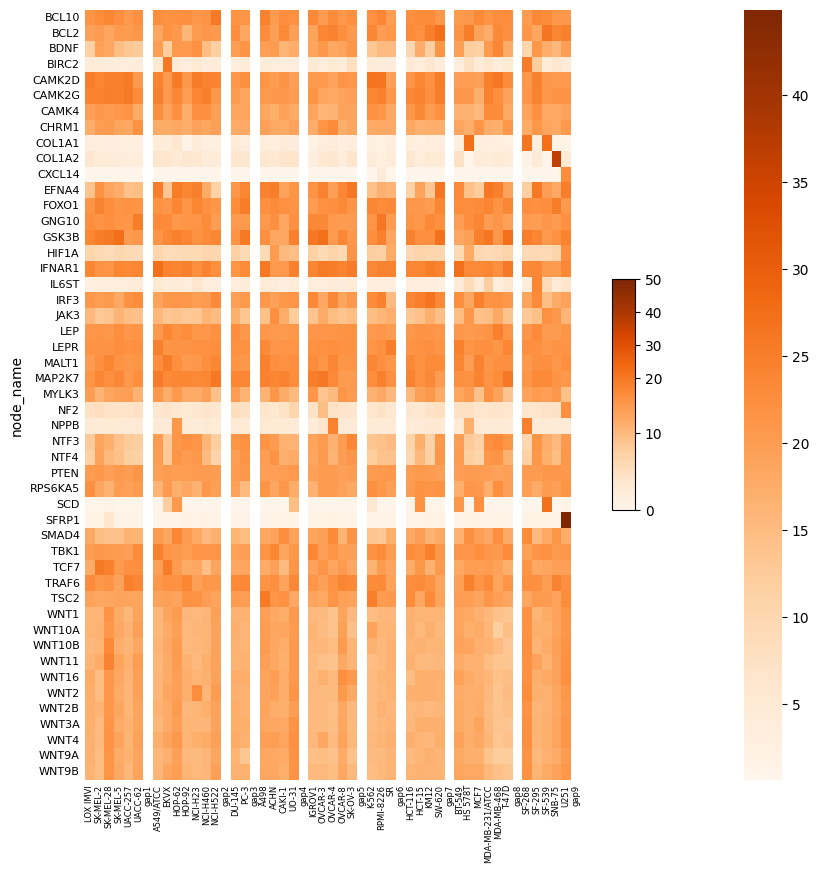

In [121]:
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(10, 10))
# Assuming the first column's name is 'ylabel_column_name'

norm = TwoSlopeNorm(vmin=0, vmax=50, vcenter=15)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)

# Remove lines from xticks and yticks
ax.tick_params(axis='both', which='both', length=0)
# Set x and y tick labels
ax.set_xticks(np.arange(all_plot_unique_all_cell_whole_idf_att_def_df.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(all_plot_unique_all_cell_whole_idf_att_def_df.shape[0]) + 0.5, minor=False)

# Optionally, set x and y tick label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

sns.heatmap(all_plot_unique_all_cell_whole_idf_att_def_df, cmap='Oranges', annot=False)

fig.colorbar(col, shrink=0.3, aspect=10, orientation='vertical')